In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load tickers from a CSV file
tickers_df = pd.read_csv('Tickers.csv')  # Ensure this file contains updated tickers
tickers = tickers_df['Ticker'].tolist()  # Adjust based on the column name in your CSV

In [3]:
tickers

['RELIANCE.NS',
 'TCS.NS',
 'BHARTIARTL.NS',
 'MRF.NS',
 'WIPRO.NS',
 'SBIN.NS',
 'ITC.NS',
 'KOTAKBANK.NS',
 'BAJFINANCE.NS',
 'ULTRACEMCO.NS',
 'TITAN.NS',
 'ASIANPAINT.NS',
 'HCLTECH.NS',
 'INFY.BO',
 'HDFCBANK.BO',
 'ICICIBANK.BO',
 'ADANIPOWER.BO',
 'APOLLOHOSP.BO',
 'HEROMOTOCO.BO',
 'MARUTI.BO']

In [4]:
from datetime import datetime, timedelta
# Get today's date as the end date
end_date = datetime.today().strftime('%Y-%m-%d')
# Calculate the start date (10 years before end date)
start_date = (datetime.today().replace(year=datetime.today().year - 10)).strftime('%Y-%m-%d')

In [5]:
print("Start Date:", start_date)
print("End Date:", end_date)

Start Date: 2015-04-04
End Date: 2025-04-04


In [6]:
# Download historical data for each ticker without specifying date range
data = yf.download(tickers, start=start_date, end=end_date, progress=False, auto_adjust=False)
stock_data = data.stack(level=1).reset_index()
# Rename columns to make it more clear
stock_data.columns = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [7]:
stock_data.head()

Date         Ticker         Open         High          Low  \
0 2015-04-06  ADANIPOWER.BO    47.400002    47.400002    48.049999   
1 2015-04-06  APOLLOHOSP.BO  1360.727173  1411.300049  1428.150024   
2 2015-04-06  ASIANPAINT.NS   765.734741   824.500000   831.400024   
3 2015-04-06  BAJFINANCE.NS   411.596832   424.084991   427.399994   
4 2015-04-06  BHARTIARTL.NS   343.092072   361.223907   368.704346   

         Close    Adj Close     Volume  
0    46.750000    48.049999   401324.0  
1  1385.000000  1386.449951    12324.0  
2   819.000000   829.000000   687263.0  
3   415.500000   415.799988   127490.0  
4   359.105957   362.575806  4825167.0

In [8]:
stock_data['Ticker'].value_counts()

ITC.NS           2470
KOTAKBANK.NS     2470
ULTRACEMCO.NS    2470
TITAN.NS         2470
TCS.NS           2470
SBIN.NS          2470
RELIANCE.NS      2470
MRF.NS           2470
WIPRO.NS         2470
HCLTECH.NS       2470
BHARTIARTL.NS    2470
BAJFINANCE.NS    2470
ASIANPAINT.NS    2470
INFY.BO          2447
HDFCBANK.BO      2447
MARUTI.BO        2445
APOLLOHOSP.BO    2444
ICICIBANK.BO     2444
HEROMOTOCO.BO    2444
ADANIPOWER.BO    2444
Name: Ticker, dtype: int64

In [9]:
stock_data.tail()

Date         Ticker          Open          High           Low  \
49220 2025-04-03        SBIN.NS    779.200012    779.200012    784.700012   
49221 2025-04-03         TCS.NS   3403.149902   3403.149902   3502.000000   
49222 2025-04-03       TITAN.NS   3127.550049   3127.550049   3151.000000   
49223 2025-04-03  ULTRACEMCO.NS  11606.599609  11606.599609  11650.049805   
49224 2025-04-03       WIPRO.NS    256.350006    256.350006    260.500000   

              Close     Adj Close      Volume  
49220    769.950012    770.000000   7956680.0  
49221   3396.149902   3491.000000   4537821.0  
49222   3068.000000   3071.000000   1115568.0  
49223  11155.000000  11189.000000    361884.0  
49224    255.300003    259.899994  12262561.0

In [10]:
# View dimensions of dataset   
rows, col = stock_data.shape
print ("Dimensions of dataset: {}" . format (stock_data.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (49225, 8)
Rows: 49225 
Columns: 8


In [11]:
# Dtype
print(f'The data type contains:\n object --> {stock_data.dtypes.value_counts()[1]}\n float64 --> {stock_data.dtypes.value_counts()[0]}')

The data type contains:
 object --> 1
 float64 --> 6


In [12]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49225 entries, 0 to 49224
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       49225 non-null  datetime64[ns]
 1   Ticker     49225 non-null  object        
 2   Open       49225 non-null  float64       
 3   High       49225 non-null  float64       
 4   Low        49225 non-null  float64       
 5   Close      49225 non-null  float64       
 6   Adj Close  49225 non-null  float64       
 7   Volume     49225 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 3.0+ MB


In [13]:
float_cols = stock_data.columns.drop(["Ticker","Date"])
stock_data[float_cols] = stock_data[float_cols].round().astype("Int64")
stock_data.head()

Date         Ticker  Open  High   Low  Close  Adj Close   Volume
0 2015-04-06  ADANIPOWER.BO    47    47    48     47         48   401324
1 2015-04-06  APOLLOHOSP.BO  1361  1411  1428   1385       1386    12324
2 2015-04-06  ASIANPAINT.NS   766   824   831    819        829   687263
3 2015-04-06  BAJFINANCE.NS   412   424   427    416        416   127490
4 2015-04-06  BHARTIARTL.NS   343   361   369    359        363  4825167

In [14]:
stock_data.sort_values(by="Date").head()

Date         Ticker  Open  High   Low  Close  Adj Close   Volume
0  2015-04-06  ADANIPOWER.BO    47    47    48     47         48   401324
19 2015-04-06       WIPRO.NS   105   116   118    116        118  7872158
18 2015-04-06  ULTRACEMCO.NS  2786  2893  2910   2870       2899   137119
17 2015-04-06       TITAN.NS   382   404   404    391        395   904638
16 2015-04-06         TCS.NS  1050  1274  1281   1250       1279  1568542

In [15]:
stock_data1 = stock_data[(stock_data['Ticker'] == 'RELIANCE.NS')]    
stock_data1.head()

Date       Ticker  Open  High  Low  Close  Adj Close    Volume
14 2015-04-06  RELIANCE.NS   171   189  192    188        191  12334096
34 2015-04-07  RELIANCE.NS   173   190  191    189        189  21275454
54 2015-04-08  RELIANCE.NS   180   198  199    190        191  24821205
74 2015-04-09  RELIANCE.NS   186   205  205    196        198  27276420
94 2015-04-10  RELIANCE.NS   188   207  208    203        205  25323219

In [16]:
# View dimensions of dataset   
rows, col = stock_data1.shape
print ("Dimensions of dataset: {}" . format (stock_data1.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (2470, 8)
Rows: 2470 
Columns: 8


In [17]:
# Dtype
print(f'The data type contains:\n object --> {stock_data1.dtypes.value_counts()[1]}\n float64 --> {stock_data1.dtypes.value_counts()[0]}')

The data type contains:
 object --> 1
 float64 --> 6


In [18]:
stock_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2470 entries, 14 to 49219
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2470 non-null   datetime64[ns]
 1   Ticker     2470 non-null   object        
 2   Open       2470 non-null   Int64         
 3   High       2470 non-null   Int64         
 4   Low        2470 non-null   Int64         
 5   Close      2470 non-null   Int64         
 6   Adj Close  2470 non-null   Int64         
 7   Volume     2470 non-null   Int64         
dtypes: Int64(6), datetime64[ns](1), object(1)
memory usage: 188.1+ KB


In [19]:
stock_data2 = stock_data1.copy()

In [20]:
# Dtype
print(f'The data type contains:\n object --> {stock_data2.dtypes.value_counts()[1]}\n int64 --> {stock_data2.dtypes.value_counts()[0]}')

The data type contains:
 object --> 1
 int64 --> 6


In [21]:
stock_data2.sort_values(by="Date").head()

Date       Ticker  Open  High  Low  Close  Adj Close    Volume
14 2015-04-06  RELIANCE.NS   171   189  192    188        191  12334096
34 2015-04-07  RELIANCE.NS   173   190  191    189        189  21275454
54 2015-04-08  RELIANCE.NS   180   198  199    190        191  24821205
74 2015-04-09  RELIANCE.NS   186   205  205    196        198  27276420
94 2015-04-10  RELIANCE.NS   188   207  208    203        205  25323219

In [22]:
# Plotting count plot by year
Year = stock_data2['Date'].dt.year

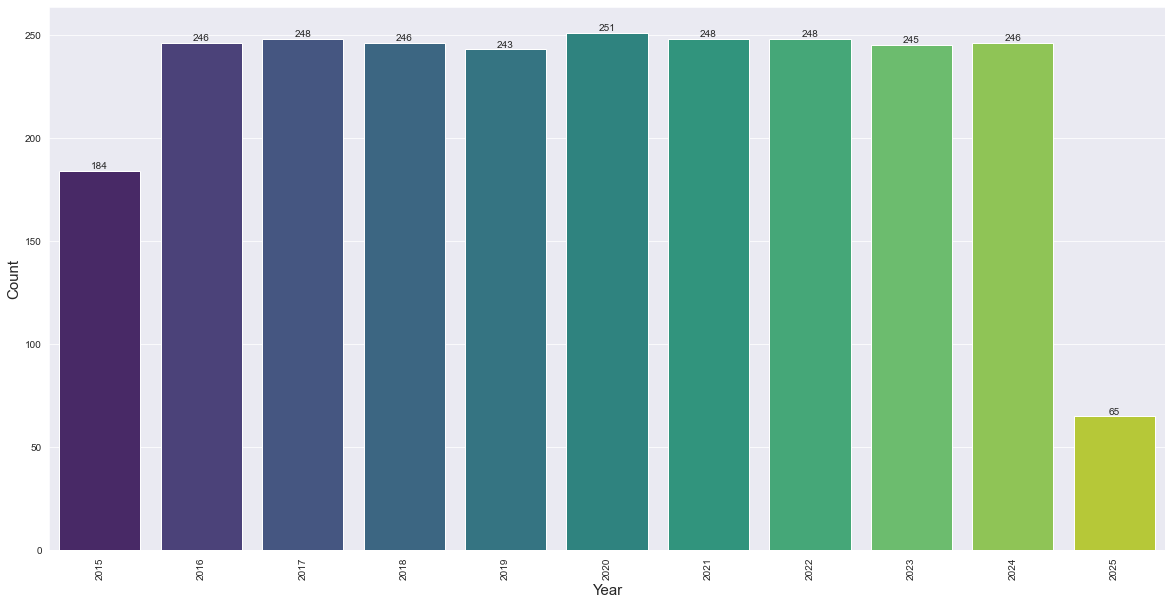

In [23]:
plt.figure(figsize = (20, 10))
sns.set_style('darkgrid')
ax=sns.countplot(data=stock_data2, x=Year, palette='viridis')
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel("Count", fontsize= 15)
plt.xlabel("Year", fontsize= 15)
plt.xticks(rotation=90)
plt.show()

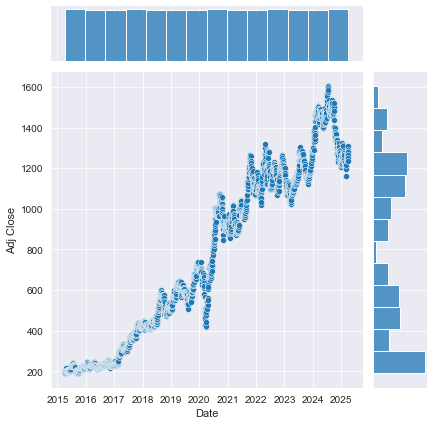

In [24]:
# Target-Date
sns.jointplot(data=stock_data2, x="Date", y="Adj Close")
sns.set_style('darkgrid')
plt.ylabel("Adj Close", fontsize=11)
plt.xlabel("Date", fontsize=11)
plt.show()

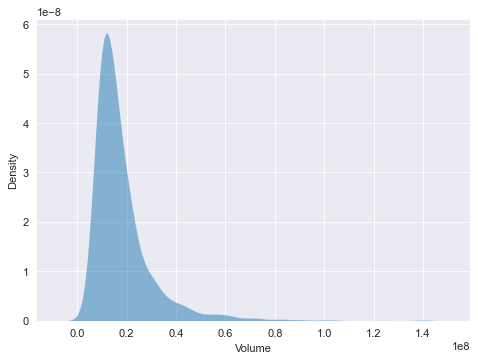

In [25]:
# The data distribution in "Volume"
plt.figure(figsize=(7,5), dpi=80)
sns.kdeplot(data=stock_data2, x="Volume", fill=True, common_norm=False,
            palette="crest", alpha=.5, linewidth=0)
plt.show()

In [26]:
# Assessing the 0 values of the "Volume" column
len(stock_data2[stock_data2["Volume"]==0])

1

In [27]:
stock_data3 = stock_data2[stock_data2["Volume"] != 0]

In [28]:
stock_data3.head()

Date       Ticker  Open  High  Low  Close  Adj Close    Volume
14 2015-04-06  RELIANCE.NS   171   189  192    188        191  12334096
34 2015-04-07  RELIANCE.NS   173   190  191    189        189  21275454
54 2015-04-08  RELIANCE.NS   180   198  199    190        191  24821205
74 2015-04-09  RELIANCE.NS   186   205  205    196        198  27276420
94 2015-04-10  RELIANCE.NS   188   207  208    203        205  25323219

In [29]:
# Assessing the 0 values of the "Volume" column
len(stock_data3[stock_data3["Volume"]==0])

0

In [30]:
# Assessing the 0 values of the "Volume" column
len(stock_data[stock_data["Volume"]==0])

13

In [31]:
stock_data = stock_data[stock_data["Volume"] != 0]

In [32]:
stock_data.head()

Date         Ticker  Open  High   Low  Close  Adj Close   Volume
0 2015-04-06  ADANIPOWER.BO    47    47    48     47         48   401324
1 2015-04-06  APOLLOHOSP.BO  1361  1411  1428   1385       1386    12324
2 2015-04-06  ASIANPAINT.NS   766   824   831    819        829   687263
3 2015-04-06  BAJFINANCE.NS   412   424   427    416        416   127490
4 2015-04-06  BHARTIARTL.NS   343   361   369    359        363  4825167

In [33]:
# Plotting count plot by year
Year1 = stock_data['Date'].dt.year

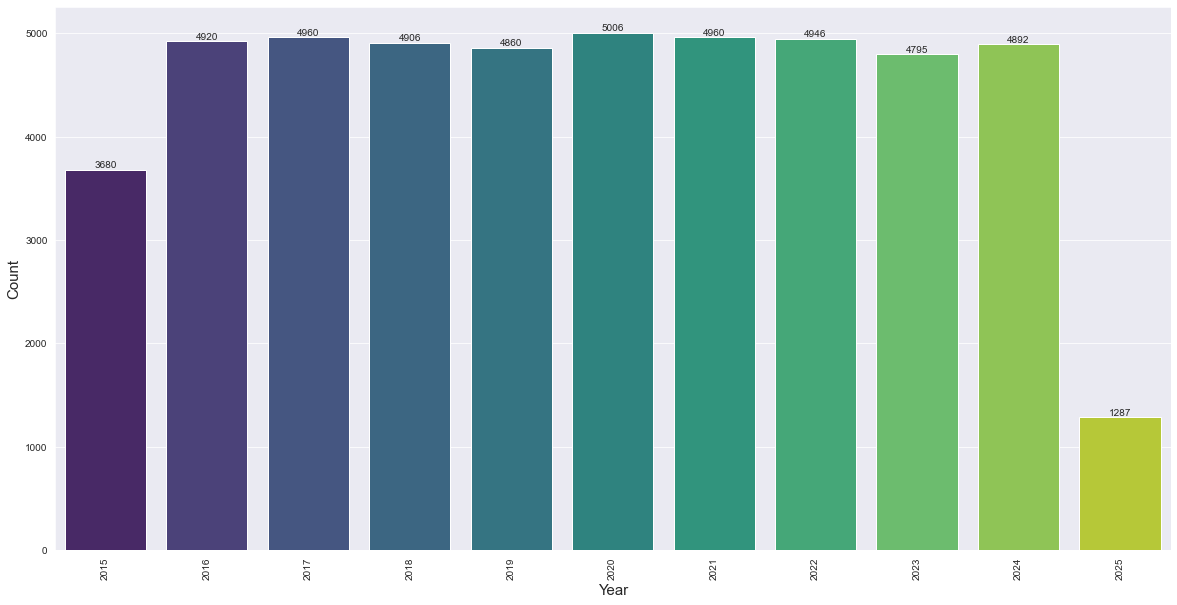

In [34]:
plt.figure(figsize = (20, 10))
sns.set_style('darkgrid')
ax=sns.countplot(data=stock_data, x=Year1, palette='viridis')
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel("Count", fontsize= 15)
plt.xlabel("Year", fontsize= 15)
plt.xticks(rotation=90)
plt.show()

In [35]:
for i in stock_data.columns.drop(['Ticker','Date']):
    print("The min value of ",i," is ",stock_data[i].min())

The min value of  Open  is  15
The min value of  High  is  15
The min value of  Low  is  16
The min value of  Close  is  15
The min value of  Adj Close  is  16
The min value of  Volume  is  534


In [36]:
for i in stock_data.columns.drop(['Ticker','Date']):
    print("The max value of ",i," is ",stock_data[i].max())

The max value of  Open  is  150504
The max value of  High  is  150725
The max value of  Low  is  151445
The max value of  Close  is  150050
The max value of  Adj Close  is  150850
The max value of  Volume  is  326148900


In [37]:
# List of price-related columns
columns_to_modify = ['Open', 'High', 'Low', 'Close', 'Adj Close']

# Replace values < 100 with NaN
stock_data[columns_to_modify] = stock_data[columns_to_modify].applymap(lambda x: np.nan if x < 100 else x)

In [38]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Date                    0
Ticker                  0
Open                 2205
High                 1855
Low                  1808
Close                1912
Adj Close            1846
Volume                  0

In [39]:
columns_no_varience = []
for col in stock_data.columns:
    if len(stock_data[col].unique()) ==1:
        columns_no_varience.append(col)
        stock_data.drop([col], axis = 1, inplace = True)
print(columns_no_varience)
print (stock_data.shape)

[]
(49212, 8)


In [40]:
duplicate_rows = stock_data.duplicated()
print(duplicate_rows.any())
stock_data.drop_duplicates(inplace = True)
print(stock_data.shape)

False
(49212, 8)


In [41]:
stock_data_numerical_columns = ['Open', 'High', 'Close', 'Low', 'Adj Close']
for column in stock_data_numerical_columns:
    print('Skewness of', column, 'before outlier treatment: ', stock_data[column].skew())

Skewness of Open before outlier treatment:  4.8503911008309
Skewness of High before outlier treatment:  4.8491709051148995
Skewness of Close before outlier treatment:  4.8503984124055055
Skewness of Low before outlier treatment:  4.847439030025956
Skewness of Adj Close before outlier treatment:  4.851119692000594


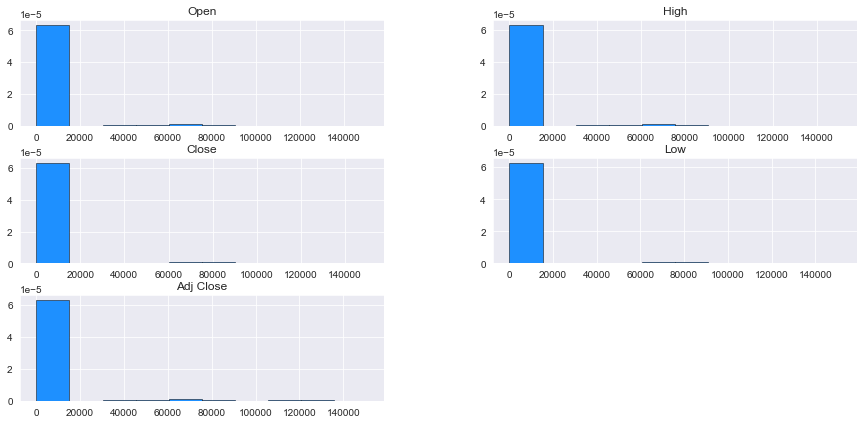

In [42]:
stock_data[['Open', 'High', 'Close', 'Low', 'Adj Close']].hist (figsize = (15,7),
       color = 'dodgerblue', density = True, edgecolor = 'black', linewidth = 0.5 )
plt.show()

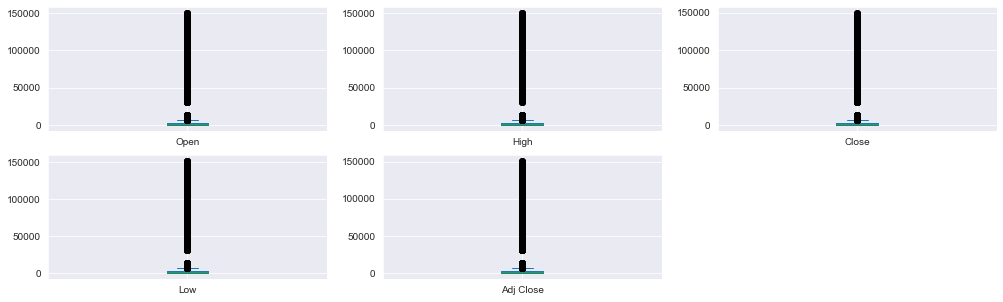

In [43]:
stock_data[['Open', 'High', 'Close', 'Low', 'Adj Close']].plot(kind = 'box',
                                                                        subplots = True, layout = (2,3), figsize = (17,5))
plt.show()

In [44]:
stock_data['Open'].isna().sum()

2205

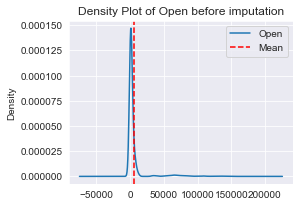

In [45]:
stock_data['Open'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Open before imputation')
plt.axvline(x=stock_data['Open'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [46]:
stock_data['Open']=stock_data.groupby(['Date'], group_keys=False)['Open'].apply(lambda x:x.fillna(x.median()))
stock_data['Open'].isna().sum()

0

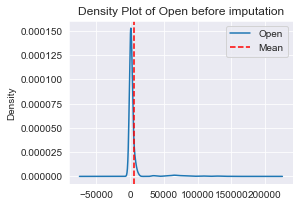

In [47]:
stock_data['Open'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Open before imputation')
plt.axvline(x=stock_data['Open'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [48]:
stock_data['Close'].isna().sum()

1912

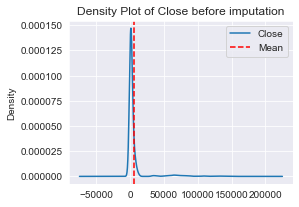

In [49]:
stock_data['Close'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Close before imputation')
plt.axvline(x=stock_data['Close'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [50]:
stock_data['Close']=stock_data.groupby(['Date'], group_keys=False)['Close'].apply(lambda x:x.fillna(x.median()))
stock_data['Close'].isna().sum()

0

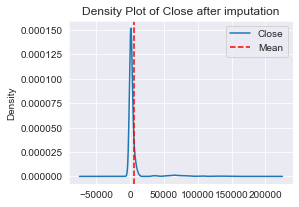

In [51]:
stock_data['Close'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Close after imputation')
plt.axvline(x=stock_data['Close'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [52]:
stock_data['Low'].isna().sum()

1808

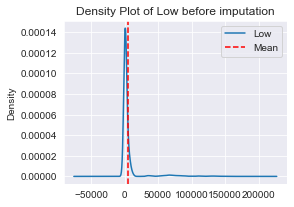

In [53]:
stock_data['Low'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Low before imputation')
plt.axvline(x=stock_data['Low'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [54]:
stock_data['Low']=stock_data.groupby(['Date'], group_keys=False)['Low'].apply(lambda x:x.fillna(x.median()))
stock_data['Low'].isna().sum()

0

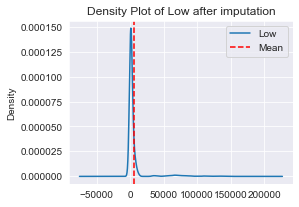

In [55]:
stock_data['Low'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Low after imputation')
plt.axvline(x=stock_data['Low'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [56]:
stock_data['High'].isna().sum()

1855

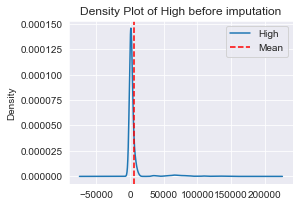

In [57]:
stock_data['High'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of High before imputation')
plt.axvline(x=stock_data['High'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [58]:
stock_data['High']=stock_data.groupby(['Date'], group_keys=False)['High'].apply(lambda x:x.fillna(x.median()))
stock_data['High'].isna().sum()

0

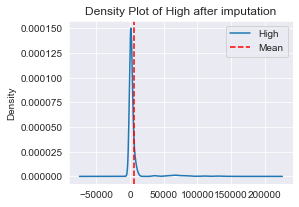

In [59]:
stock_data['High'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of High after imputation')
plt.axvline(x=stock_data['High'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [60]:
stock_data['Adj Close'].isna().sum()

1846

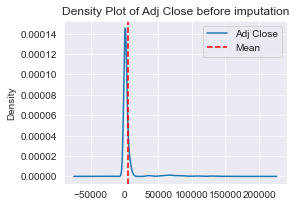

In [61]:
stock_data['Adj Close'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Adj Close before imputation')
plt.axvline(x=stock_data['High'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [62]:
stock_data['Adj Close']=stock_data.groupby(['Date'], group_keys=False)['Adj Close'].apply(lambda x:x.fillna(x.median()))
stock_data['Adj Close'].isna().sum()

0

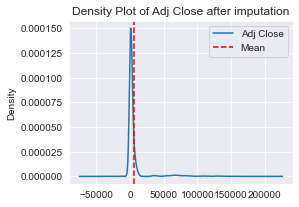

In [63]:
stock_data['Adj Close'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Adj Close after imputation')
plt.axvline(x=stock_data['Adj Close'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [64]:
stock_data_numerical_columns = ['Open', 'High', 'Close', 'Low', 'Adj Close']
for column in stock_data_numerical_columns:
    Q1 = stock_data[column].quantile(0.25)
    Q3 = stock_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Drop NaN values before comparison
    column_data = stock_data[column].dropna()
    outliers = [x for x in column_data if x < lower or x > upper]

    print(column)
    print('Identified outliers: %d' % len(outliers))
    print('*' * 40)

Open
Identified outliers: 5884
****************************************
High
Identified outliers: 5273
****************************************
Close
Identified outliers: 5277
****************************************
Low
Identified outliers: 5282
****************************************
Adj Close
Identified outliers: 5286
****************************************


In [65]:
# Define price-related columns
price_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close']

# Calculate IQR for each column
Q1 = stock_data[price_columns].quantile(0.25)
Q3 = stock_data[price_columns].quantile(0.75)
IQR = Q3 - Q1

# Define acceptable range (1.5 * IQR Rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
stock_data = stock_data[~((stock_data[price_columns] < lower_bound) | (stock_data[price_columns] > upper_bound)).any(axis=1)]

In [66]:
# Calculate IQR for the Volume column
Q1 = stock_data['Volume'].quantile(0.25)  # 25th percentile
Q3 = stock_data['Volume'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
stock_data = stock_data[(stock_data['Volume'] >= lower_bound) & (stock_data['Volume'] <= upper_bound)]

In [67]:
stock_data_numerical_columns = ['Open', 'High', 'Close', 'Low', 'Adj Close']
for column in stock_data_numerical_columns:
    print('Skewness of', column, 'after outlier treatment: ', stock_data[column].skew())

Skewness of Open after outlier treatment:  1.4532233534026375
Skewness of High after outlier treatment:  1.372242835791022
Skewness of Close after outlier treatment:  1.3710172068058313
Skewness of Low after outlier treatment:  1.3751428551764695
Skewness of Adj Close after outlier treatment:  1.3749213075286921


In [68]:
price_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close']

# Apply log transformation
stock_data[price_columns] = np.log1p(stock_data[price_columns])

In [69]:
# Apply log transformation
stock_data['Volume'] = np.log1p(stock_data['Volume'])

In [70]:
stock_data_numerical_columns = ['Open', 'High', 'Close', 'Low', 'Adj Close']
for column in stock_data_numerical_columns:
    print('Skewness of', column, 'after outlier treatment: ', stock_data[column].skew())

Skewness of Open after outlier treatment:  -0.17925085858300152
Skewness of High after outlier treatment:  -0.23073606182730197
Skewness of Close after outlier treatment:  -0.22470213350818188
Skewness of Low after outlier treatment:  -0.23505351843934416
Skewness of Adj Close after outlier treatment:  -0.2313142656212598


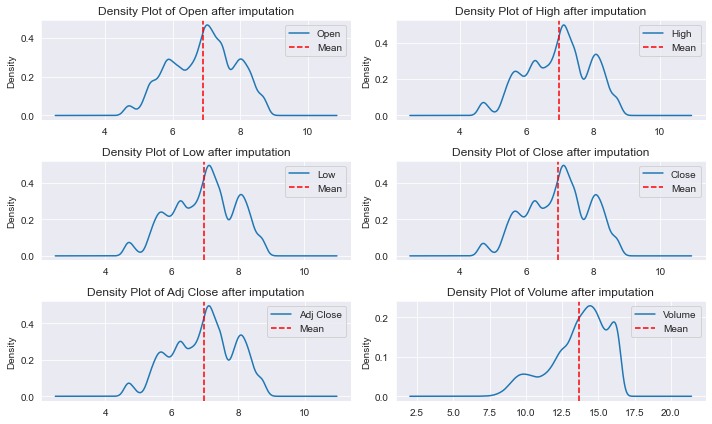

In [71]:
# Exclude unwanted columns
col = stock_data.columns.drop(['Ticker', 'Date'])

# Number of plots per row
plots_per_row = 2

# Initialize subplots
fig, axes = plt.subplots(nrows=(len(col) + 1) // plots_per_row, ncols=plots_per_row, figsize=(10, 6))
axes = axes.flatten()  # Flatten axes array for easy iteration

for idx, i in enumerate(col):
    stock_data[i].plot(kind='density', ax=axes[idx], figsize=(10, 6))
    axes[idx].set_title(f'Density Plot of {i} after imputation')
    axes[idx].axvline(x=stock_data[i].mean(), color='red', linestyle='--', label='Mean')
    axes[idx].legend()

# Hide unused axes (if any)
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

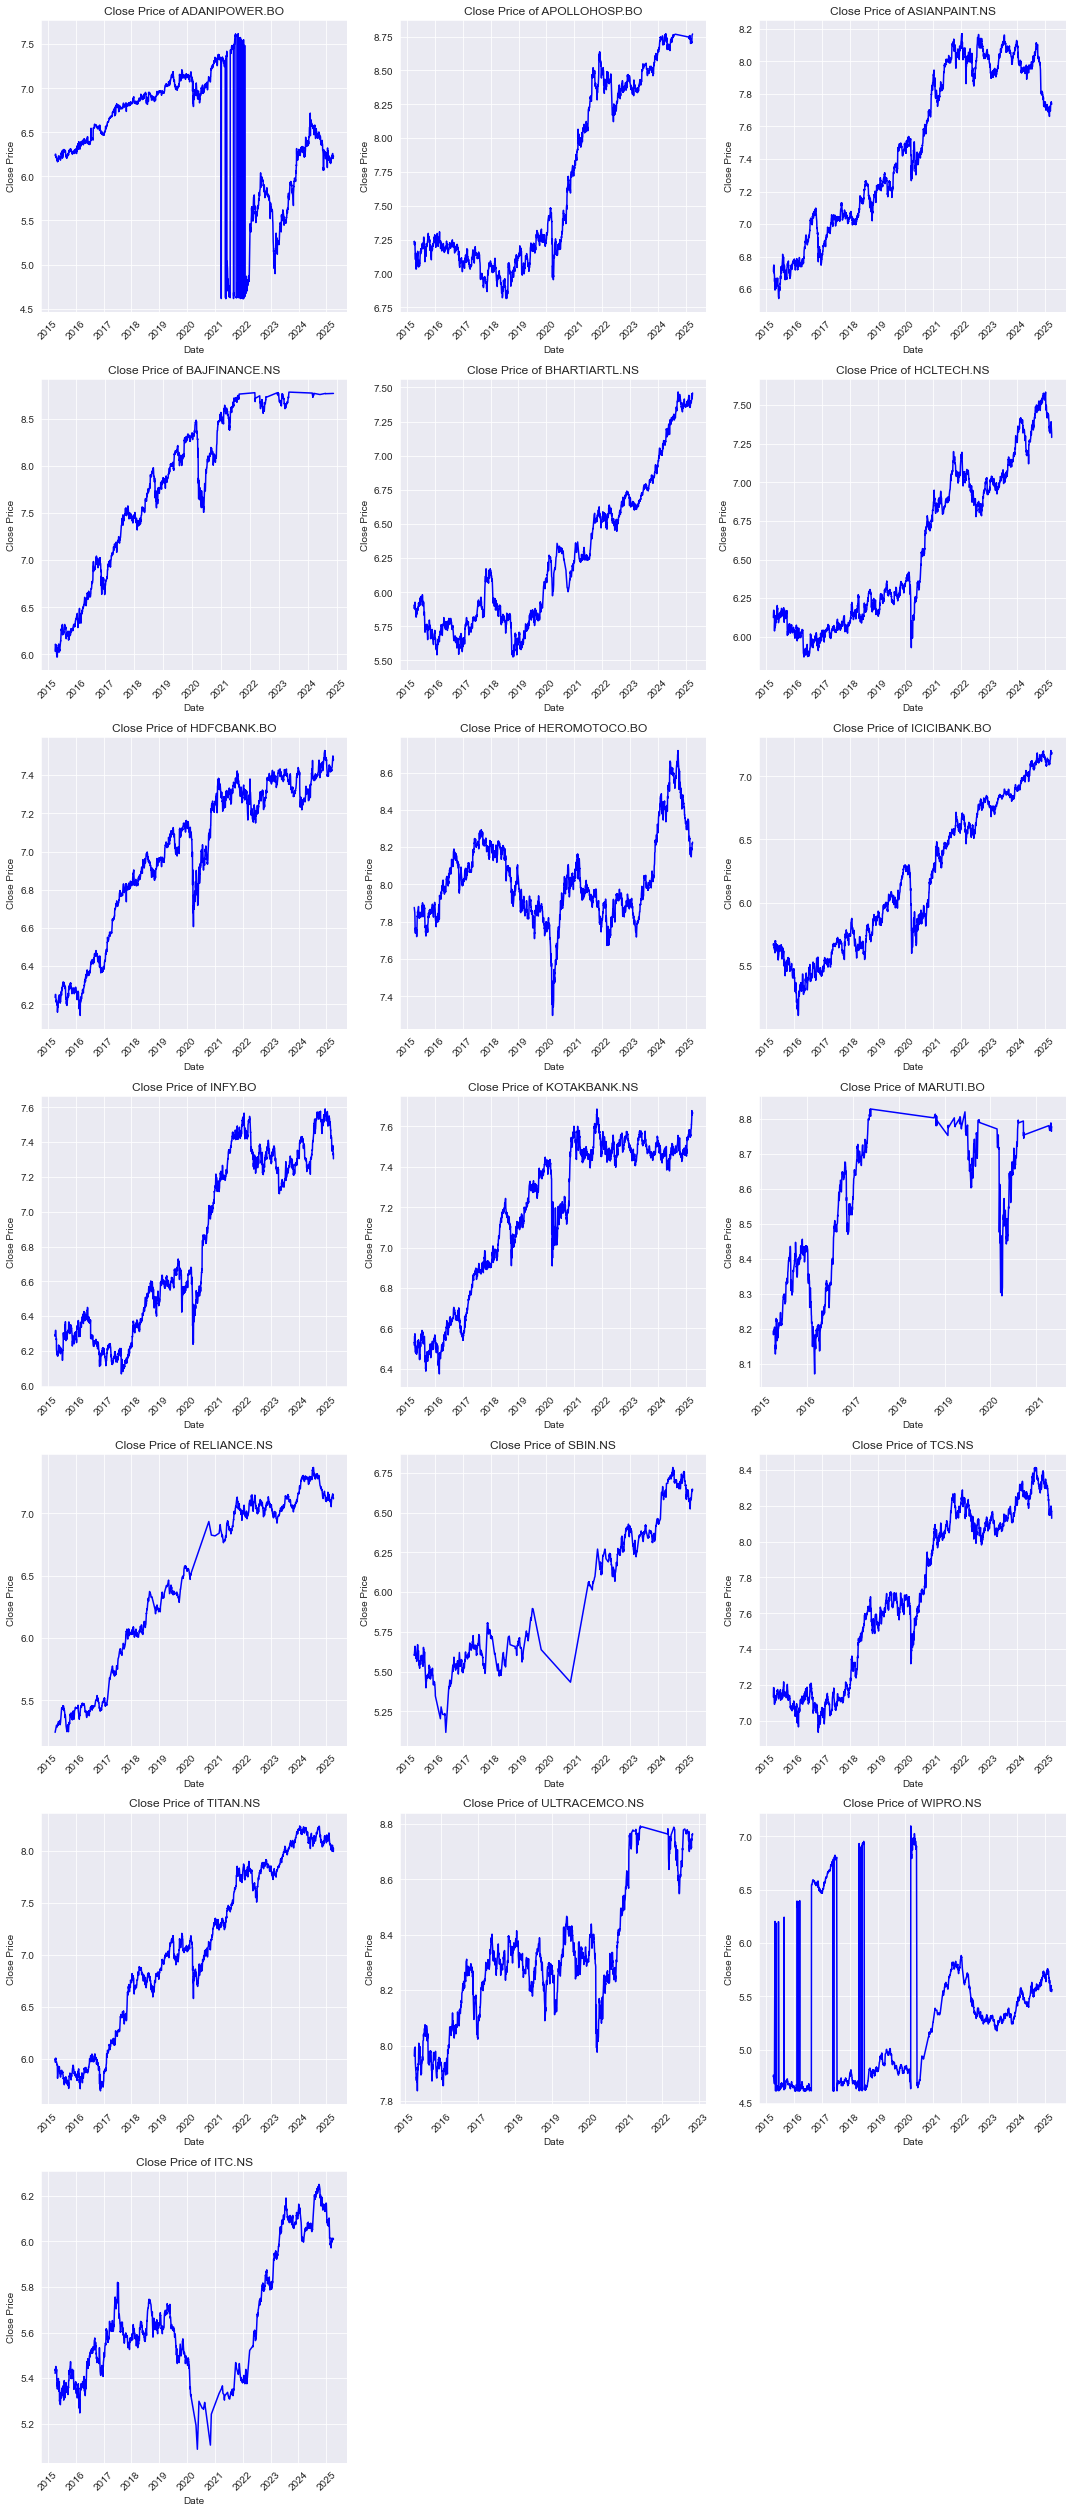

In [72]:
import math
# Unique tickers
tickers = stock_data['Ticker'].unique()
num_tickers = len(tickers)

# Set rows and columns (3 graphs per row)
plots_per_row = 3
rows = math.ceil(num_tickers / plots_per_row)

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=plots_per_row, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten to easily iterate

# Plot each ticker's Close Price
for idx, ticker in enumerate(tickers):
    temp_df = stock_data[stock_data['Ticker'] == ticker]  # Filter for ticker
    axes[idx].plot(temp_df['Date'], temp_df['Close'], linestyle='-', color='b')
    axes[idx].set_title(f"Close Price of {ticker}")
    axes[idx].set_xlabel("Date")
    axes[idx].set_ylabel("Close Price")
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(True)

# Hide any extra unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout for clarity
plt.show()

In [73]:
stock_data['Ticker'].value_counts()

ASIANPAINT.NS    2469
TCS.NS           2464
TITAN.NS         2463
KOTAKBANK.NS     2450
HDFCBANK.BO      2447
INFY.BO          2446
HEROMOTOCO.BO    2444
ICICIBANK.BO     2442
HCLTECH.NS       2441
ADANIPOWER.BO    2437
APOLLOHOSP.BO    2289
BHARTIARTL.NS    2173
WIPRO.NS         1932
BAJFINANCE.NS    1725
ITC.NS           1634
ULTRACEMCO.NS    1621
RELIANCE.NS      1372
SBIN.NS          1037
MARUTI.BO         757
Name: Ticker, dtype: int64

In [74]:
stock_data.loc[(stock_data['Ticker'] == 'MARUTI.BO') , 'Ticker'] = np.nan
stock_data.loc[(stock_data['Ticker'] == 'ADANIPOWER.BO') , 'Ticker'] = np.nan

In [75]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Date                    0
Ticker               3194
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0

In [76]:
stock_data = stock_data.dropna(subset=['Ticker'])

In [77]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Date                    0
Ticker                  0
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0

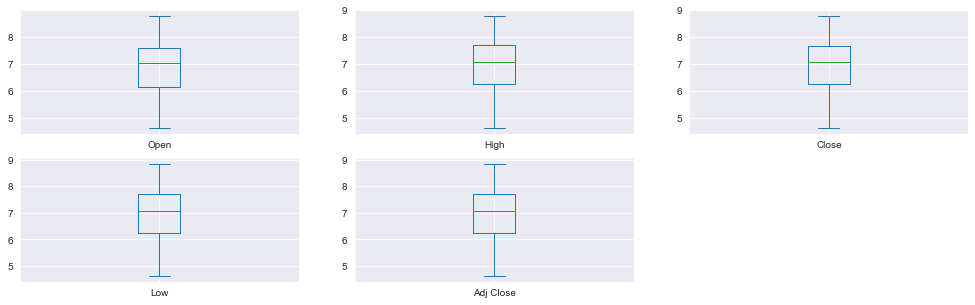

In [78]:
stock_data[['Open', 'High', 'Close', 'Low', 'Adj Close']].plot(kind = 'box',
                                                                        subplots = True, layout = (2,3), figsize = (17,5))
plt.show()

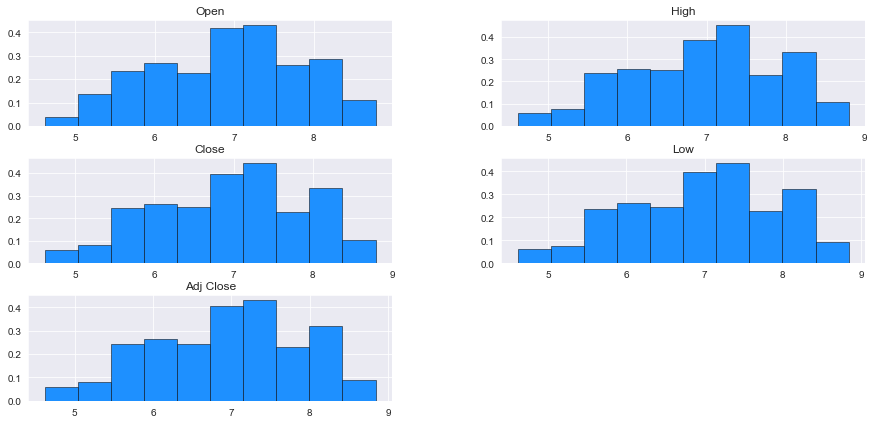

In [79]:
stock_data[['Open', 'High', 'Close', 'Low', 'Adj Close']].hist (figsize = (15,7),
       color = 'dodgerblue', density = True, edgecolor = 'black', linewidth = 0.5 )
plt.show()

<AxesSubplot:>

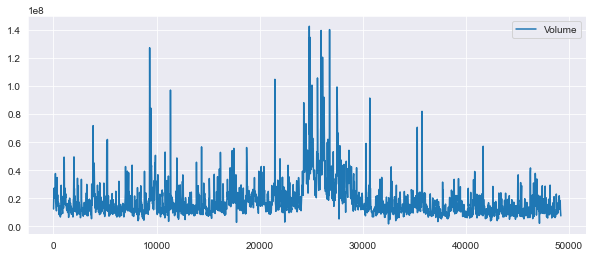

In [80]:
# Now let's plot the total volume of stock being traded each day over the past year
stock_data3['Volume'].plot(legend=True, figsize=(10,4))

In [81]:
# Condition for Bullish case: Low ≤ Open ≤ Close ≤ High
bullish_condition = (stock_data["Low"] <= stock_data["Open"]) & (stock_data["Open"] <= stock_data["Adj Close"]) & (stock_data["Adj Close"] <= stock_data["High"])
# Condition for Bearish case: Low ≤ Close ≤ Open ≤ High
bearish_condition = (stock_data["Low"] <= stock_data["Adj Close"]) & (stock_data["Adj Close"] <= stock_data["Open"]) & (stock_data["Open"] <= stock_data["High"])
# Rows that do not satisfy either condition
invalid_rows = stock_data[~(bullish_condition | bearish_condition)]
# Print invalid rows if any
if not invalid_rows.empty:
    print("Invalid rows found that do not match Bullish or Bearish cases:")
    print(invalid_rows)
else:
    print("All rows in stock_data are valid.")

Invalid rows found that do not match Bullish or Bearish cases:
            Date         Ticker      Open      High       Low     Close  \
1     2015-04-06  APOLLOHOSP.BO  7.216709  7.252762  7.264730  7.234177   
2     2015-04-06  ASIANPAINT.NS  6.642487  6.715383  6.723832  6.709304   
3     2015-04-06  BAJFINANCE.NS  6.023448  6.052089  6.059123  6.033086   
4     2015-04-06  BHARTIARTL.NS  5.840642  5.891644  5.913503  5.886104   
5     2015-04-06     HCLTECH.NS  5.891644  6.146329  6.154858  6.124683   
...          ...            ...       ...       ...       ...       ...   
49219 2025-04-03    RELIANCE.NS  7.130899  7.130899  7.133296  7.118016   
49220 2025-04-03        SBIN.NS  6.659294  6.659294  6.666957  6.647688   
49221 2025-04-03         TCS.NS  8.132706  8.132706  8.161375  8.130648   
49222 2025-04-03       TITAN.NS  8.048469  8.048469  8.055792  8.029107   
49224 2025-04-03       WIPRO.NS  5.549076  5.549076  5.564520  5.545177   

       Adj Close     Volume  
1     

In [82]:
# Fix 'Low' price (should be the minimum of Open, Adj Close, and itself)
stock_data["Low"] = stock_data[["Low", "Open", "Adj Close"]].min(axis=1)

# Fix 'High' price (should be the maximum of Open, Adj Close, and itself)
stock_data["High"] = stock_data[["High", "Open", "Adj Close"]].max(axis=1)

# Ensure 'Low' is never greater than 'High'
stock_data["Low"] = stock_data[["Low", "High"]].min(axis=1)

In [83]:
# Re-check if all rows are now valid
bullish_condition = (stock_data["Low"] <= stock_data["Open"]) & (stock_data["Open"] <= stock_data["Adj Close"]) & (stock_data["Adj Close"] <= stock_data["High"])
bearish_condition = (stock_data["Low"] <= stock_data["Adj Close"]) & (stock_data["Adj Close"] <= stock_data["Open"]) & (stock_data["Open"] <= stock_data["High"])

# Find still invalid rows
invalid_rows = stock_data[~(bullish_condition | bearish_condition)]

if invalid_rows.empty:
    print("All rows are now valid!")
else:
    print("Some rows are still invalid:")
    print(invalid_rows)

All rows are now valid!


In [84]:
stock_data.describe()

Open          High           Low         Close     Adj Close  \
count  35849.000000  35849.000000  35849.000000  35849.000000  35849.000000   
mean       6.913693      6.985247      6.895401      6.953299      6.963927   
std        0.941021      0.921147      0.965038      0.943272      0.945745   
min        4.615121      4.663439      4.615121      4.615121      4.615121   
25%        6.139885      6.265301      6.107023      6.234411      6.244167   
50%        7.004882      7.072422      7.003065      7.057037      7.067320   
75%        7.589336      7.701200      7.587817      7.681099      7.695758   
max        8.778480      8.841737      8.778480      8.792853      8.841737   

          Volume  
count    35849.0  
mean   13.751739  
std      2.00608  
min     6.854355  
25%    12.625115  
50%    14.150415  
75%    15.272794  
max    16.564058

In [85]:
stock_data.corr()   

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.996608  0.983325  0.980834   0.979055 -0.478939
High       0.996608  1.000000  0.981565  0.985473   0.983889 -0.496583
Low        0.983325  0.981565  1.000000  0.994035   0.995575 -0.484416
Close      0.980834  0.985473  0.994035  1.000000   0.998140 -0.500002
Adj Close  0.979055  0.983889  0.995575  0.998140   1.000000 -0.500456
Volume    -0.478939 -0.496583 -0.484416 -0.500002  -0.500456  1.000000

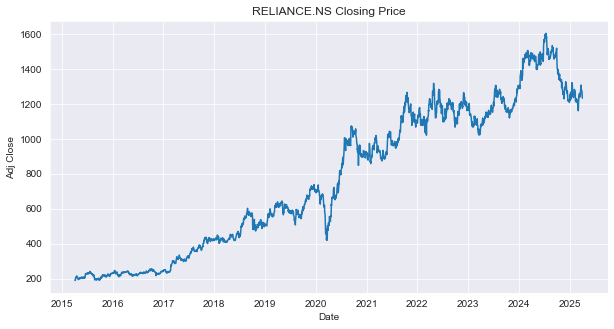

In [86]:
# plot lineplot
stock = 'RELIANCE.NS'
plt.figure(figsize = (10,5))
sns.lineplot(data = stock_data3,x='Date',y='Adj Close')
plt.title(f'{stock} Closing Price')
plt.show()

<AxesSubplot:>

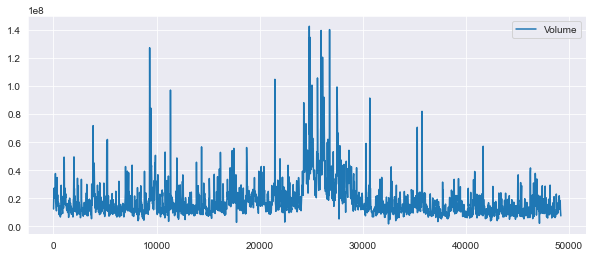

In [87]:
stock_data3['Volume'].plot(legend=True,figsize=(10,4))

In [88]:
Tech_list=stock_data["Ticker"].unique()
Tech_list

array(['APOLLOHOSP.BO', 'ASIANPAINT.NS', 'BAJFINANCE.NS', 'BHARTIARTL.NS',
       'HCLTECH.NS', 'HDFCBANK.BO', 'HEROMOTOCO.BO', 'ICICIBANK.BO',
       'INFY.BO', 'KOTAKBANK.NS', 'RELIANCE.NS', 'SBIN.NS', 'TCS.NS',
       'TITAN.NS', 'ULTRACEMCO.NS', 'WIPRO.NS', 'ITC.NS'], dtype=object)

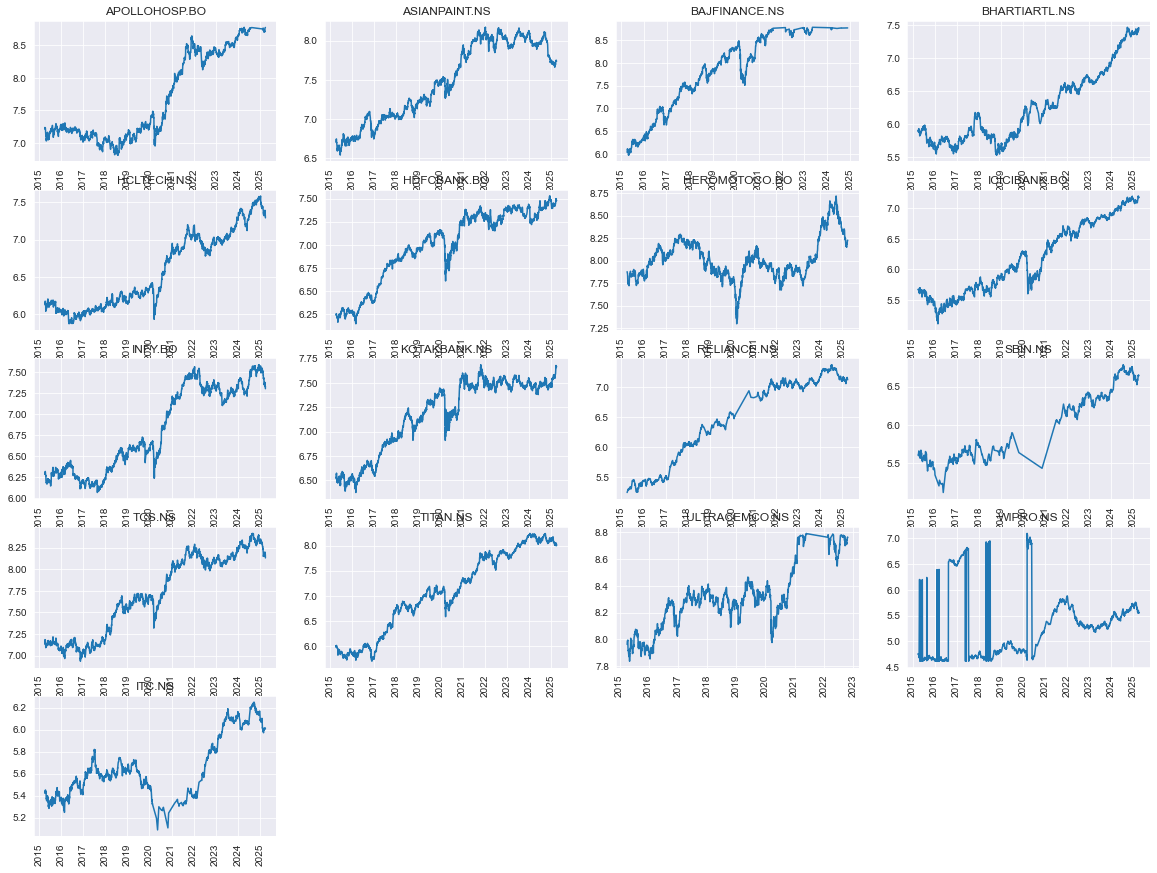

In [89]:
plt.figure(figsize=(20,15))
for i, company in enumerate(Tech_list,1):
    plt.subplot(5,4,i)
    plt.title(company)
    df=stock_data[stock_data["Ticker"]== company]
    plt.plot(df["Date"], df["Close"])
    plt.xticks(rotation="vertical")

In [90]:
stock_data3.head()

Date       Ticker  Open  High  Low  Close  Adj Close    Volume
14 2015-04-06  RELIANCE.NS   171   189  192    188        191  12334096
34 2015-04-07  RELIANCE.NS   173   190  191    189        189  21275454
54 2015-04-08  RELIANCE.NS   180   198  199    190        191  24821205
74 2015-04-09  RELIANCE.NS   186   205  205    196        198  27276420
94 2015-04-10  RELIANCE.NS   188   207  208    203        205  25323219

In [91]:
col=['Open','Low','High','Adj Close']
stock_data3[col] = stock_data3[col].astype(float)

In [92]:
stock_data3["Daily price change"]= stock_data3["Adj Close"]-stock_data3["Open"]

In [93]:
stock_data3.head()

Date       Ticker   Open   High    Low  Close  Adj Close    Volume  \
14 2015-04-06  RELIANCE.NS  171.0  189.0  192.0    188      191.0  12334096   
34 2015-04-07  RELIANCE.NS  173.0  190.0  191.0    189      189.0  21275454   
54 2015-04-08  RELIANCE.NS  180.0  198.0  199.0    190      191.0  24821205   
74 2015-04-09  RELIANCE.NS  186.0  205.0  205.0    196      198.0  27276420   
94 2015-04-10  RELIANCE.NS  188.0  207.0  208.0    203      205.0  25323219   

    Daily price change  
14                20.0  
34                16.0  
54                11.0  
74                12.0  
94                17.0

In [94]:
stock_data3["% daily price change"]= ((stock_data3["Daily price change"])/stock_data3["Adj Close"])*100

In [95]:
stock_data3.head()

Date       Ticker   Open   High    Low  Close  Adj Close    Volume  \
14 2015-04-06  RELIANCE.NS  171.0  189.0  192.0    188      191.0  12334096   
34 2015-04-07  RELIANCE.NS  173.0  190.0  191.0    189      189.0  21275454   
54 2015-04-08  RELIANCE.NS  180.0  198.0  199.0    190      191.0  24821205   
74 2015-04-09  RELIANCE.NS  186.0  205.0  205.0    196      198.0  27276420   
94 2015-04-10  RELIANCE.NS  188.0  207.0  208.0    203      205.0  25323219   

    Daily price change  % daily price change  
14                20.0             10.471204  
34                16.0              8.465608  
54                11.0              5.759162  
74                12.0              6.060606  
94                17.0              8.292683

In [96]:
import plotly.express as px
plot=px.line(stock_data3, x="Date", y="% daily price change", title= "RELIANCE.NS")
plot.show()

In [97]:
fig = px.line(stock_data3, x="Date", y="% daily price change", title='Daily price change in stock' ,template = 'plotly_dark')
fig.show()

In [98]:
stock_data3["Smoothed Change"] = stock_data3["% daily price change"].rolling(window=20).mean()

In [99]:
plot = px.line(stock_data3, x="Date", y="Smoothed Change", title="RELIANCE.NS - Smoothed Daily Price Change")
plot.show()

In [100]:
stock_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2469 entries, 14 to 49219
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2469 non-null   datetime64[ns]
 1   Ticker                2469 non-null   object        
 2   Open                  2469 non-null   float64       
 3   High                  2469 non-null   float64       
 4   Low                   2469 non-null   float64       
 5   Close                 2469 non-null   Int64         
 6   Adj Close             2469 non-null   float64       
 7   Volume                2469 non-null   Int64         
 8   Daily price change    2469 non-null   float64       
 9   % daily price change  2469 non-null   float64       
 10  Smoothed Change       2450 non-null   float64       
dtypes: Int64(2), datetime64[ns](1), float64(7), object(1)
memory usage: 236.3+ KB


<AxesSubplot:xlabel='Date'>

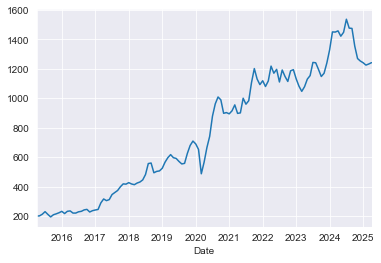

In [101]:
# Convert 'Date' column to datetime if it's not already in datetime format
stock_data3['Date'] = pd.to_datetime(stock_data3['Date'])
# Set 'Date' as the index
stock_data3.set_index('Date', inplace=True)
# Now you can resample by month and plot the mean of 'Close' prices
stock_data3['Close'].resample('M').mean().plot()

<AxesSubplot:xlabel='Date'>

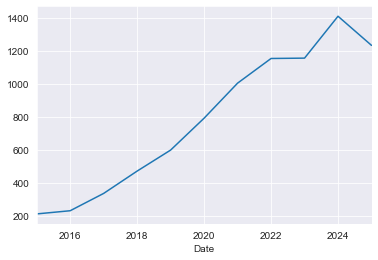

In [102]:
stock_data3['Close'].resample('Y').mean().plot()

In [103]:
col=['Open','High','Low','Adj Close']
stock_data[col]=stock_data[col].astype(float)

In [104]:
# Pivot the dataset to get Close prices for each ticker
close_prices = stock_data.pivot(columns='Ticker', values='Close')
# Reset the index to simple integers
close_prices.reset_index(drop=True, inplace=True)
# Assign index as 1, 2, 3...
close_prices.index = range(1, len(close_prices) + 1)

In [105]:
close_prices.head()

Ticker  APOLLOHOSP.BO  ASIANPAINT.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
1            7.234177            NaN            NaN            NaN   
2                 NaN       6.709304            NaN            NaN   
3                 NaN            NaN       6.033086            NaN   
4                 NaN            NaN            NaN       5.886104   
5                 NaN            NaN            NaN            NaN   

Ticker  HCLTECH.NS  HDFCBANK.BO  HEROMOTOCO.BO  ICICIBANK.BO  INFY.BO  ITC.NS  \
1              NaN          NaN            NaN           NaN      NaN     NaN   
2              NaN          NaN            NaN           NaN      NaN     NaN   
3              NaN          NaN            NaN           NaN      NaN     NaN   
4              NaN          NaN            NaN           NaN      NaN     NaN   
5         6.124683          NaN            NaN           NaN      NaN     NaN   

Ticker  KOTAKBANK.NS  RELIANCE.NS  SBIN.NS  TCS.NS  TITAN.NS  ULTRACEMCO.NS  \
1                NaN          NaN      NaN     NaN       NaN            NaN   
2                NaN          NaN      NaN     NaN       NaN            NaN   
3                NaN          NaN      NaN     NaN       NaN            NaN   
4                NaN          NaN      NaN     NaN       NaN            NaN   
5                NaN          NaN      NaN     NaN       NaN            NaN   

Ticker  WIPRO.NS  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
5            NaN

In [106]:
# Fill missing values using forward fill
close_prices.fillna(method='ffill', inplace=True)
# Optionally, use backward fill
close_prices.fillna(method='bfill', inplace=True)

In [107]:
close_prices.head()

Ticker  APOLLOHOSP.BO  ASIANPAINT.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
1            7.234177       6.709304       6.033086       5.886104   
2            7.234177       6.709304       6.033086       5.886104   
3            7.234177       6.709304       6.033086       5.886104   
4            7.234177       6.709304       6.033086       5.886104   
5            7.234177       6.709304       6.033086       5.886104   

Ticker  HCLTECH.NS  HDFCBANK.BO  HEROMOTOCO.BO  ICICIBANK.BO   INFY.BO  \
1         6.124683      6.23637       7.876638      5.673323  6.293419   
2         6.124683      6.23637       7.876638      5.673323  6.293419   
3         6.124683      6.23637       7.876638      5.673323  6.293419   
4         6.124683      6.23637       7.876638      5.673323  6.293419   
5         6.124683      6.23637       7.876638      5.673323  6.293419   

Ticker    ITC.NS  KOTAKBANK.NS  RELIANCE.NS   SBIN.NS    TCS.NS  TITAN.NS  \
1       5.420535      6.517671     5.241747  5.605802  7.131699  5.971262   
2       5.420535      6.517671     5.241747  5.605802  7.131699  5.971262   
3       5.420535      6.517671     5.241747  5.605802  7.131699  5.971262   
4       5.420535      6.517671     5.241747  5.605802  7.131699  5.971262   
5       5.420535      6.517671     5.241747  5.605802  7.131699  5.971262   

Ticker  ULTRACEMCO.NS  WIPRO.NS  
1            7.962416  4.762174  
2            7.962416  4.762174  
3            7.962416  4.762174  
4            7.962416  4.762174  
5            7.962416  4.762174

In [108]:
missing_values = pd.DataFrame(close_prices.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Ticker                       
APOLLOHOSP.BO               0
ASIANPAINT.NS               0
BAJFINANCE.NS               0
BHARTIARTL.NS               0
HCLTECH.NS                  0
HDFCBANK.BO                 0
HEROMOTOCO.BO               0
ICICIBANK.BO                0
INFY.BO                     0
ITC.NS                      0
KOTAKBANK.NS                0
RELIANCE.NS                 0
SBIN.NS                     0
TCS.NS                      0
TITAN.NS                    0
ULTRACEMCO.NS               0
WIPRO.NS                    0

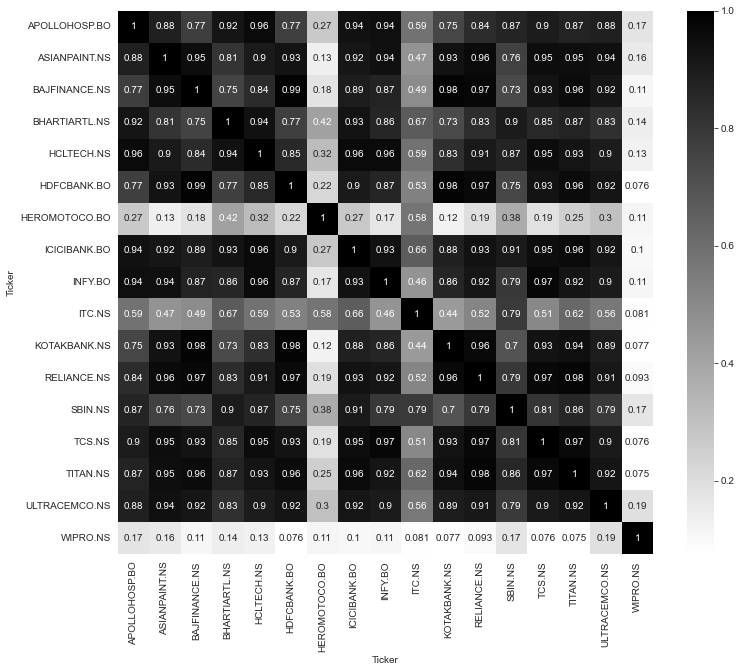

In [109]:
# Set the figure size to make the heatmap larger
plt.figure(figsize=(12, 10))  # Adjust width and height as needed

# Generate the heatmap
sns.heatmap(close_prices.corr(), annot=True, cmap='gray_r', linecolor="black")

# Show the plot
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '2015-12-31 00:00:00'),
  Text(1, 0, '2016-12-31 00:00:00'),
  Text(2, 0, '2017-12-31 00:00:00'),
  Text(3, 0, '2018-12-31 00:00:00'),
  Text(4, 0, '2019-12-31 00:00:00'),
  Text(5, 0, '2020-12-31 00:00:00'),
  Text(6, 0, '2021-12-31 00:00:00'),
  Text(7, 0, '2022-12-31 00:00:00'),
  Text(8, 0, '2023-12-31 00:00:00'),
  Text(9, 0, '2024-12-31 00:00:00'),
  Text(10, 0, '2025-12-31 00:00:00')])

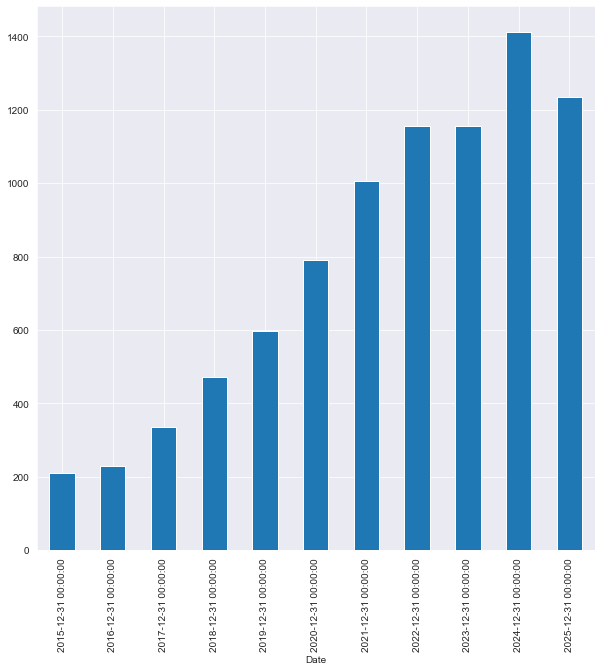

In [110]:
plt.figure(figsize=(10,10))
stock_data3['Close'].resample("Y").mean().plot(kind="bar")
plt.xticks(rotation="vertical")

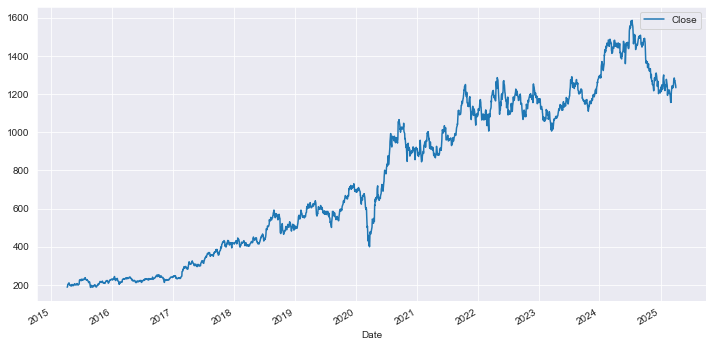

In [111]:
# Let's see a historical view of the closing price
stock_data3['Close'].plot(legend=True, figsize = (12, 6))
plt.show()

In [112]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    stock_data3[column_name]=pd.DataFrame.rolling(stock_data3['Close'],ma).mean()

In [113]:
missing_values = pd.DataFrame(stock_data3.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Ticker                             0
Open                               0
High                               0
Low                                0
Close                              0
Adj Close                          0
Volume                             0
Daily price change                 0
% daily price change               0
Smoothed Change                   19
MA for 10 days                     9
MA for 20 days                    19
MA for 50 days                    49

In [114]:
# Drop all NaN values from stock_data
stock_data3 = stock_data3.dropna()

In [115]:
missing_values = pd.DataFrame(stock_data3.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Ticker                             0
Open                               0
High                               0
Low                                0
Close                              0
Adj Close                          0
Volume                             0
Daily price change                 0
% daily price change               0
Smoothed Change                    0
MA for 10 days                     0
MA for 20 days                     0
MA for 50 days                     0

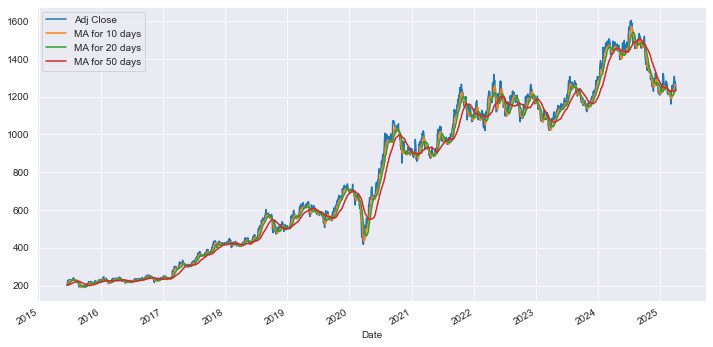

In [116]:
stock_data3[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

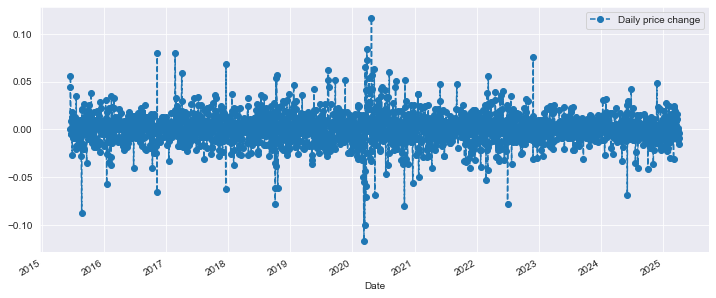

In [117]:
# use pct_change to find the percent change for each day
stock_data3['Daily price change'] =  stock_data3['Close'].pct_change()
# plot the daily return percentage
stock_data3['Daily price change'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
plt.show()

In [118]:
stock_data["Daily price change"]= stock_data["Close"]-stock_data["Open"]
stock_data["% daily price change"]= ((stock_data["Daily price change"])/stock_data["Close"])*100

In [119]:
# Pivot the dataset to organize by Ticker
daily_returns = stock_data.pivot(index='Date', columns='Ticker', values='% daily price change')

# Reset the index to integers if required
daily_returns.reset_index(drop=True, inplace=True)
daily_returns.index = range(1, len(daily_returns) + 1)
daily_returns.head() 

Ticker  APOLLOHOSP.BO  ASIANPAINT.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
1            0.241461       0.995894       0.159763       0.772368   
2            0.402799       0.838829       0.000000       0.530704   
3            0.407862       0.985411      -0.266302       0.372014   
4            0.362270       0.890124       0.112102       0.757292   
5            0.275361       0.813154       0.331555       0.425928   

Ticker  HCLTECH.NS  HDFCBANK.BO  HEROMOTOCO.BO  ICICIBANK.BO   INFY.BO  \
1         3.804918     1.651146       3.776617      1.320237  5.865865   
2         4.031798     1.677986       3.871004      1.276328  5.812102   
3         3.833788     1.769772       3.933496      1.409182  5.807079   
4         3.746671     1.426933       3.927611      1.265618  5.805393   
5         3.922929     1.757328       3.922526      1.457390  5.775056   

Ticker    ITC.NS  KOTAKBANK.NS  RELIANCE.NS   SBIN.NS    TCS.NS  TITAN.NS  \
1            NaN     -0.424667     1.798113  1.433321  2.442632  0.388977   
2       5.361764     -0.089023          NaN  1.583152  2.482301  0.718447   
3       5.374924      0.044782          NaN  1.568969  2.415292  0.757216   
4       5.343520     -0.614587          NaN  1.146175  2.539772  0.814668   
5       5.267614     -0.021543          NaN       NaN  2.549328  0.856106   

Ticker  ULTRACEMCO.NS  WIPRO.NS  
1            0.372935  2.073314  
2            0.237717  1.917241  
3            0.271238  2.095886  
4            0.392785  2.095886  
5            0.370881  2.095886

In [120]:
missing_values = pd.DataFrame(daily_returns.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Ticker                       
APOLLOHOSP.BO             181
ASIANPAINT.NS               1
BAJFINANCE.NS             745
BHARTIARTL.NS             297
HCLTECH.NS                 29
HDFCBANK.BO                23
HEROMOTOCO.BO              26
ICICIBANK.BO               28
INFY.BO                    24
ITC.NS                    836
KOTAKBANK.NS               20
RELIANCE.NS              1098
SBIN.NS                  1433
TCS.NS                      6
TITAN.NS                    7
ULTRACEMCO.NS             849
WIPRO.NS                  538

In [121]:
# Fill missing values using forward fill
daily_returns.fillna(method='ffill', inplace=True)
# Optionally, use backward fill
daily_returns.fillna(method='bfill', inplace=True)

In [122]:
daily_returns.head() 

Ticker  APOLLOHOSP.BO  ASIANPAINT.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
1            0.241461       0.995894       0.159763       0.772368   
2            0.402799       0.838829       0.000000       0.530704   
3            0.407862       0.985411      -0.266302       0.372014   
4            0.362270       0.890124       0.112102       0.757292   
5            0.275361       0.813154       0.331555       0.425928   

Ticker  HCLTECH.NS  HDFCBANK.BO  HEROMOTOCO.BO  ICICIBANK.BO   INFY.BO  \
1         3.804918     1.651146       3.776617      1.320237  5.865865   
2         4.031798     1.677986       3.871004      1.276328  5.812102   
3         3.833788     1.769772       3.933496      1.409182  5.807079   
4         3.746671     1.426933       3.927611      1.265618  5.805393   
5         3.922929     1.757328       3.922526      1.457390  5.775056   

Ticker    ITC.NS  KOTAKBANK.NS  RELIANCE.NS   SBIN.NS    TCS.NS  TITAN.NS  \
1       5.361764     -0.424667     1.798113  1.433321  2.442632  0.388977   
2       5.361764     -0.089023     1.798113  1.583152  2.482301  0.718447   
3       5.374924      0.044782     1.798113  1.568969  2.415292  0.757216   
4       5.343520     -0.614587     1.798113  1.146175  2.539772  0.814668   
5       5.267614     -0.021543     1.798113  1.146175  2.549328  0.856106   

Ticker  ULTRACEMCO.NS  WIPRO.NS  
1            0.372935  2.073314  
2            0.237717  1.917241  
3            0.271238  2.095886  
4            0.392785  2.095886  
5            0.370881  2.095886

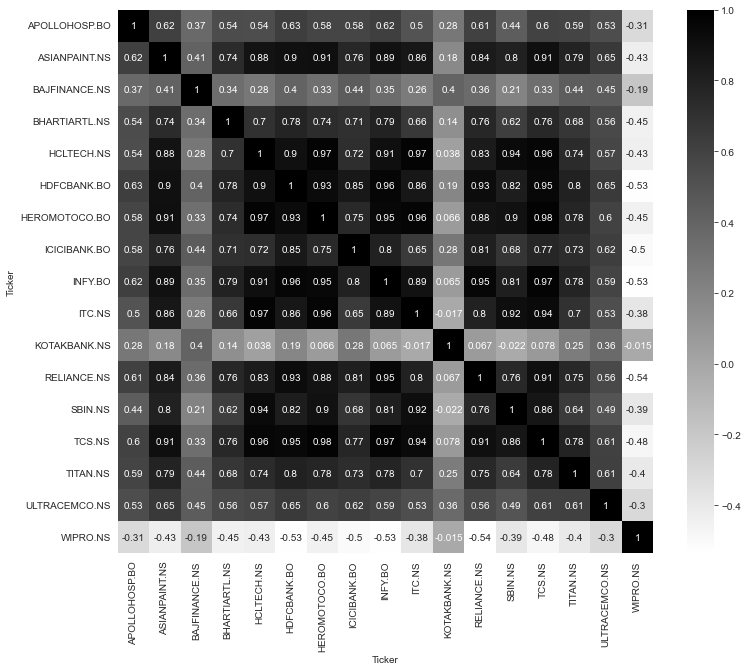

In [123]:
# Set the figure size to make the heatmap larger
plt.figure(figsize=(12, 10))  # Adjust width and height as needed

# Generate the heatmap
sns.heatmap(daily_returns.corr(), annot=True, cmap='gray_r', linecolor="black")

# Show the plot
plt.show()

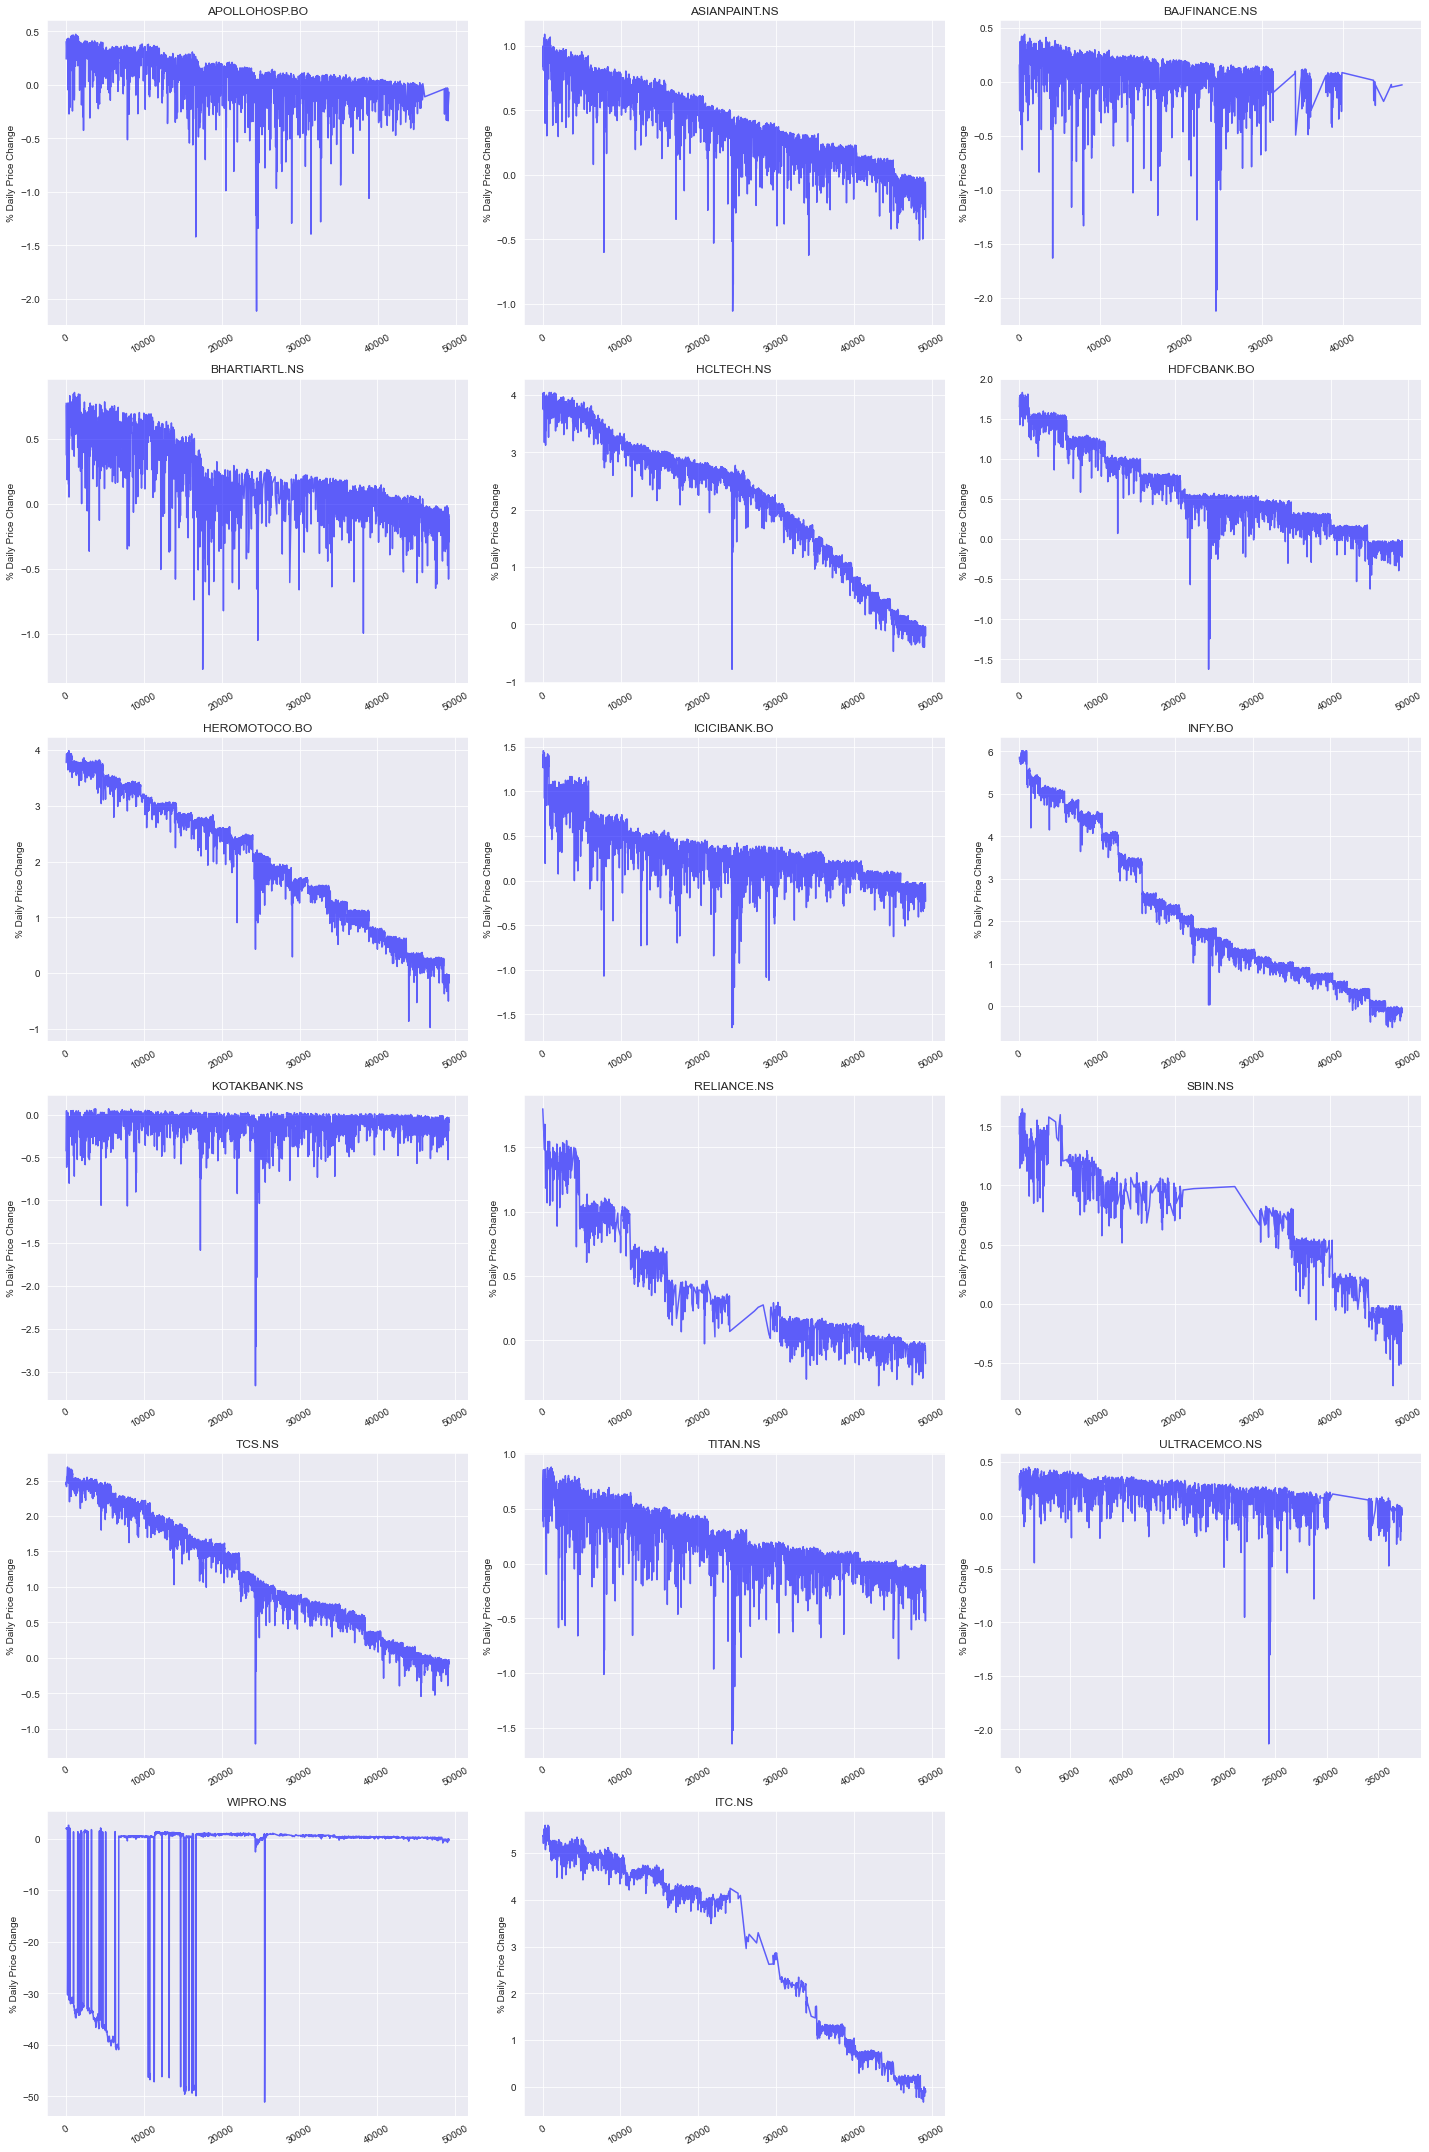

In [124]:
import matplotlib.pyplot as plt

# Store filtered stock data for each unique ticker
all_stock_data = {ticker: stock_data[stock_data["Ticker"] == ticker] for ticker in stock_data['Ticker'].unique()}

# Calculate the number of unique tickers
n_tickers = len(all_stock_data)
ncols = 3  # Keep 3 columns for better visibility
nrows = (n_tickers // ncols) + (n_tickers % ncols > 0)  # Adjust row count

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))  # Set dynamic figure size
axes = axes.flatten()  # Flatten for easy iteration

# Plot each ticker's daily price change on its respective subplot
for i, (ticker, data) in enumerate(all_stock_data.items()):
    axes[i].plot(data.index, data["% daily price change"], color="blue", alpha=0.6)
    axes[i].set_title(ticker, fontsize=12)  # Set title as the ticker name
    axes[i].tick_params(axis='x', rotation=30)  # Rotate x-axis labels for better readability
    axes[i].set_ylabel("% Daily Price Change", fontsize=10)

# Hide unused subplots (if tickers < total subplots)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [125]:
stock_data["Smoothed Change"] = stock_data["% daily price change"].rolling(window=30).mean()  # Apply smoothing
stock_data.dropna(inplace=True)  # Remove NaN values

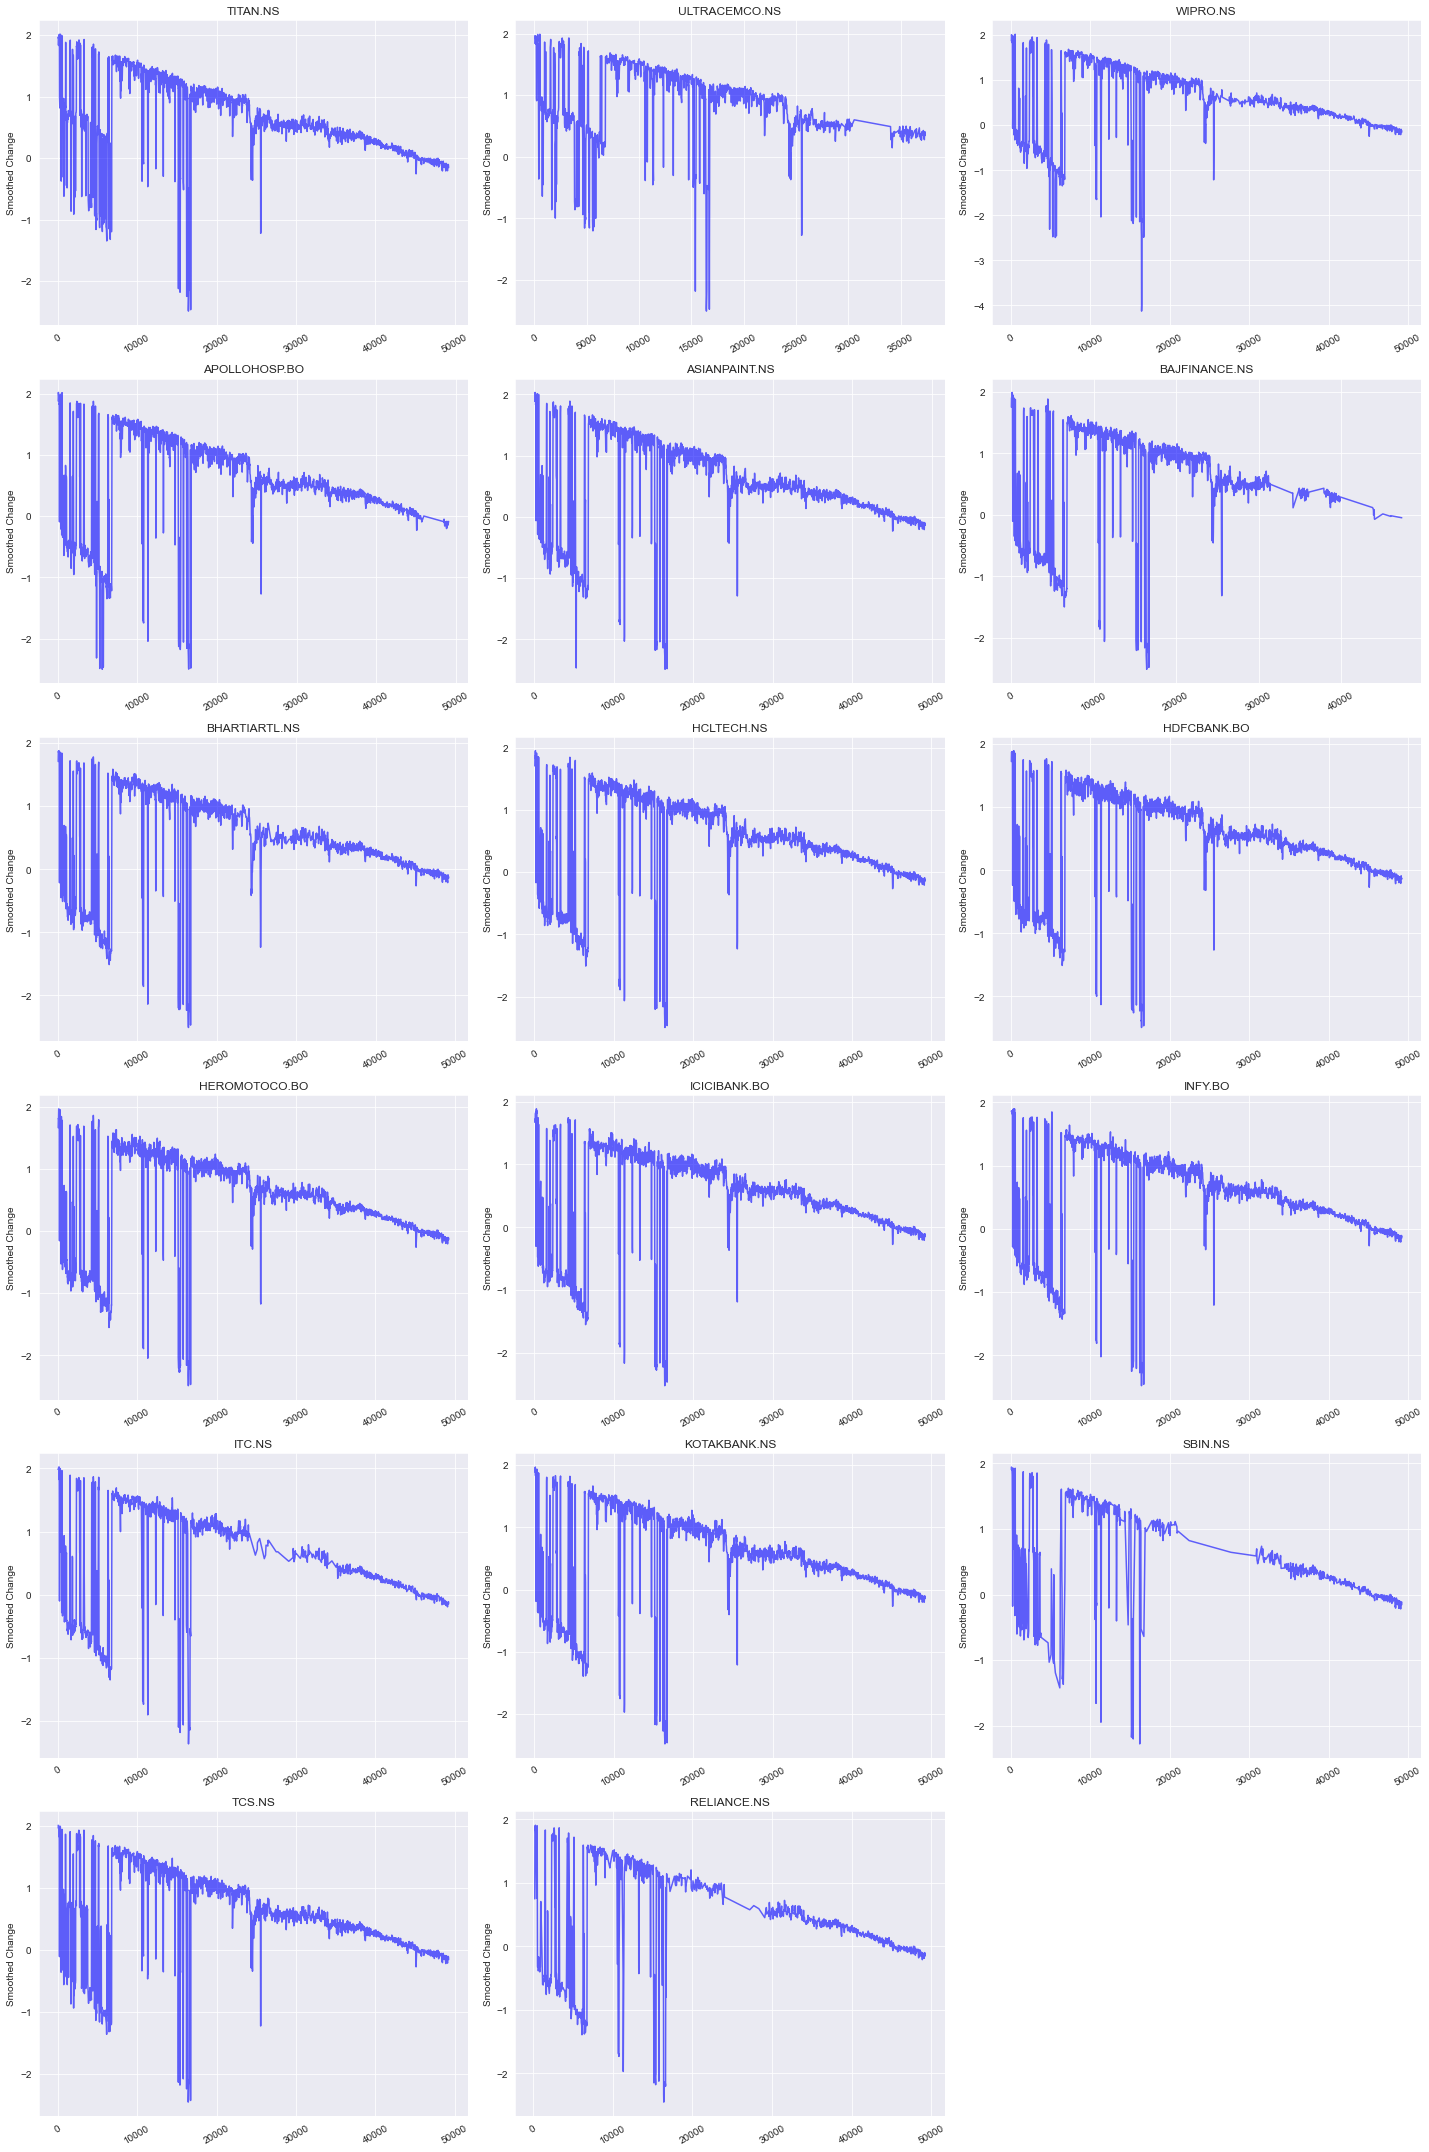

In [126]:
import matplotlib.pyplot as plt

# Store filtered stock data for each unique ticker
all_stock_data = {ticker: stock_data[stock_data["Ticker"] == ticker] for ticker in stock_data['Ticker'].unique()}

# Calculate the number of unique tickers
n_tickers = len(all_stock_data)
ncols = 3  # Keep 3 columns for better visibility
nrows = (n_tickers // ncols) + (n_tickers % ncols > 0)  # Adjust row count

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))  # Set dynamic figure size
axes = axes.flatten()  # Flatten for easy iteration

# Plot each ticker's daily price change on its respective subplot
for i, (ticker, data) in enumerate(all_stock_data.items()):
    axes[i].plot(data.index, data["Smoothed Change"], color="blue", alpha=0.6)
    axes[i].set_title(ticker, fontsize=12)  # Set title as the ticker name
    axes[i].tick_params(axis='x', rotation=30)  # Rotate x-axis labels for better readability
    axes[i].set_ylabel("Smoothed Change", fontsize=10)

# Hide unused subplots (if tickers < total subplots)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [127]:
# Convert 'Date' column to datetime if it's not already in datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

In [128]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Ticker                             0
Open                               0
High                               0
Low                                0
Close                              0
Adj Close                          0
Volume                             0
Daily price change                 0
% daily price change               0
Smoothed Change                    0

In [129]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    stock_data[column_name]=pd.DataFrame.rolling(stock_data['Adj Close'],ma).mean()
stock_data.dropna(inplace=True)  # Remove NaN values

In [130]:
stock_data["EMA_10"] = stock_data["Adj Close"].ewm(span=10, adjust=False).mean()  # Short-term trend
stock_data["EMA_50"] = stock_data["Adj Close"].ewm(span=50, adjust=False).mean()  # Medium-term trend
stock_data["EMA_200"] = stock_data["Adj Close"].ewm(span=200, adjust=False).mean()  # Long-term trend

In [131]:
# Create target variable (Close Price after 365 days)
stock_data["Close_365"] = stock_data["Close"].shift(-365)
# Drop rows with NaN target values (since shifting creates NaNs)
stock_data = stock_data.dropna()

In [132]:
stock_data.columns

Index(['Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Daily price change', '% daily price change', 'Smoothed Change',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'EMA_10',
       'EMA_50', 'EMA_200', 'Close_365'],
      dtype='object')

In [133]:
delta = stock_data['Adj Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
stock_data['RSI_14'] = 100 - (100 / (1 + rs))

stock_data['SMA_20'] = stock_data['Adj Close'].rolling(window=20).mean()
stock_data['BB_Upper'] = stock_data['SMA_20'] + (stock_data['Adj Close'].rolling(window=20).std() * 2)
stock_data['BB_Lower'] = stock_data['SMA_20'] - (stock_data['Adj Close'].rolling(window=20).std() * 2)

stock_data['MACD'] = stock_data['EMA_10'] - stock_data['EMA_50']

In [134]:
stock_data.head()

Ticker      Open      High       Low     Close  Adj Close  \
Date                                                                           
2015-04-10       WIPRO.NS  4.653960  4.762174  4.653960  4.753590   4.762174   
2015-04-13  APOLLOHOSP.BO  7.206377  7.242798  7.206377  7.234177   7.241366   
2015-04-13  ASIANPAINT.NS  6.687109  6.760415  6.687109  6.748760   6.758095   
2015-04-13  BAJFINANCE.NS  6.070738  6.115892  6.070738  6.093570   6.115892   
2015-04-13  BHARTIARTL.NS  5.899897  5.953243  5.899897  5.910797   5.913503   

               Volume  Daily price change  % daily price change  \
Date                                                              
2015-04-10  15.562713            0.099630              2.095886   
2015-04-13   8.657651            0.027800              0.384285   
2015-04-13  13.598806            0.061651              0.913515   
2015-04-13  12.614271            0.022832              0.374691   
2015-04-13  15.275957            0.010899              0.184396   

            Smoothed Change  ...  MA for 50 days    EMA_10    EMA_50  \
Date                         ...                                       
2015-04-10         1.981649  ...        6.374752  4.762174  4.762174   
2015-04-13         1.964787  ...        6.399501  5.212936  4.859397   
2015-04-13         1.991501  ...        6.375207  5.493874  4.933856   
2015-04-13         1.978748  ...        6.402111  5.606968  4.980210   
2015-04-13         1.860005  ...        6.375312  5.662702  5.016810   

             EMA_200  Close_365  RSI_14  SMA_20  BB_Upper  BB_Lower      MACD  
Date                                                                           
2015-04-10  4.762174   4.753590     NaN     NaN       NaN       NaN  0.000000  
2015-04-13  4.786843   7.234177     NaN     NaN       NaN       NaN  0.353539  
2015-04-13  4.806457   6.748760     NaN     NaN       NaN       NaN  0.560018  
2015-04-13  4.819486   6.093570     NaN     NaN       NaN       NaN  0.626758  
2015-04-13  4.830372   5.910797     NaN     NaN       NaN       NaN  0.645892  

[5 rows x 22 columns]

In [135]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Ticker                             0
Open                               0
High                               0
Low                                0
Close                              0
Adj Close                          0
Volume                             0
Daily price change                 0
% daily price change               0
Smoothed Change                    0
MA for 10 days                     0
MA for 20 days                     0
MA for 50 days                     0
EMA_10                             0
EMA_50                             0
EMA_200                            0
Close_365                          0
RSI_14                            13
SMA_20                            19
BB_Upper                          19
BB_Lower                          19
MACD                               0

In [136]:
# Drop rows with NaN target values (since shifting creates NaNs)
stock_data = stock_data.dropna()

In [137]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Ticker                             0
Open                               0
High                               0
Low                                0
Close                              0
Adj Close                          0
Volume                             0
Daily price change                 0
% daily price change               0
Smoothed Change                    0
MA for 10 days                     0
MA for 20 days                     0
MA for 50 days                     0
EMA_10                             0
EMA_50                             0
EMA_200                            0
Close_365                          0
RSI_14                             0
SMA_20                             0
BB_Upper                           0
BB_Lower                           0
MACD                               0

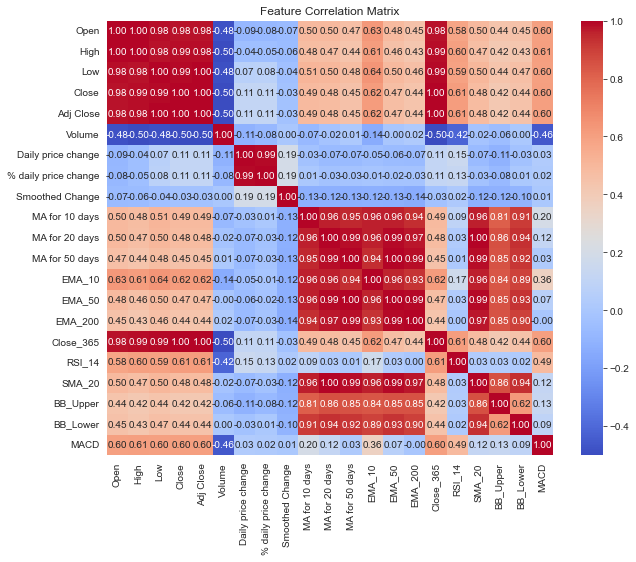

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation
correlation_matrix = stock_data.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [139]:
# Define features (X) and target variable (y)
X = stock_data.drop(columns=["Close_365", "Ticker", "Volume", "Close"])  # Drop less relevant features
y = stock_data["Close_365"]  # Target variable (Close price after 365 days)

In [140]:
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from keras.models import Sequential
import keras.backend as K  # Corrected import syntax
from keras.callbacks import EarlyStopping  # Corrected "Callbacks" to "callbacks"
from keras.optimizers import Adam  # Corrected "Optimisers" to "optimizers"
from keras.models import load_model  # Corrected "Models" to "models"
from keras.utils import plot_model  # Corrected "utils. vis_utils" spacing

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28601, 18)
(7151, 18)
(28601,)
(7151,)


In [142]:
Scaler = MinMaxScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

# Scale y
Scaler_y = MinMaxScaler()
y_train_scaled = Scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = Scaler_y.transform(y_test.values.reshape(-1, 1))

In [157]:
# Convert DataFrame to NumPy array before reshaping
X_train_array = np.array(X_train_scaled)  # Convert DataFrame to NumPy
X_test_array = np.array(X_test_scaled)    # Convert DataFrame to NumPy

# Reshape for LSTM (3D input: [samples, timesteps, features])
X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], 1, X_train_array.shape[1]))
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], 1, X_test_array.shape[1]))

In [158]:
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
# Build LSTM Model
lstm_model = Sequential([
    LSTM(32, return_sequences=False, activation='tanh', 
         input_shape=(1, X_train_reshaped.shape[2]), 
         kernel_regularizer=l2(5e-4)),  # L2 Regularization
    Dropout(0.5),  # Regularization to prevent overfitting
    
    Dense(64, activation='relu', kernel_regularizer=l2(5e-4)),
    Dense(1)  # Predicts stock price
])

In [159]:
import tensorflow as tf
# Compile Model with Adam Optimizer & Learning Rate Scheduling
lstm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), loss='mse')

In [160]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1)

# Train the model
history = lstm_model.fit(
    X_train_reshaped, y_train_scaled, 
    epochs=100, batch_size=32, 
    validation_data=(X_test_reshaped, y_test_scaled), 
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/100
894/894 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0916 - val_loss: 0.0200 - learning_rate: 3.0000e-04
Epoch 2/100
894/894 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0218 - val_loss: 0.0113 - learning_rate: 3.0000e-04
Epoch 3/100
894/894 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0122 - val_loss: 0.0075 - learning_rate: 3.0000e-04
Epoch 4/100
894/894 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0076 - val_loss: 0.0050 - learning_rate: 3.0000e-04
Epoch 5/100
894/894 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0053 - val_loss: 0.0037 - learning_rate: 3.0000e-04
Epoch 6/100
894/894 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0041 - val_loss: 0.0033 - learning_rate: 3.0000e-04
Epoch 7/100
894/894 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0033 - val_loss: 0.0028 - learning_rate: 3.0000e-04
Epoch 8/100
894/894 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0029 - val_loss: 0.0022 - learning_rate: 3.0000e-04
Epoch 9/100
894/894 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0026 - val_loss: 

In [161]:
#  Make Predictions
y_pred_lstm = lstm_model.predict(X_test_reshaped)

224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [162]:
# Inverse transform
y_pred_actual = Scaler_y.inverse_transform(y_pred_lstm)
y_test_actual = Scaler_y.inverse_transform(y_test_scaled)

In [187]:
# Metrics
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred_actual)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.12
R² Score: 0.9832


In [188]:
from sklearn.svm import SVR
# Train SVR model
svr_model = SVR(kernel='rbf', C=1, gamma=0.001, epsilon=0.1)  # Adjust hyperparameters if needed
svr_model.fit(X_train_scaled, y_train_scaled)

SVR(C=1, gamma=0.001)

In [189]:
# Predict
y_pred_svr = svr_model.predict(X_test_scaled)

In [209]:
# Evaluate Performance
mse = mean_squared_error(y_test_scaled, y_pred_svr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred_svr)

print(f"SVR Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

SVR Model Performance:
Mean Squared Error (MSE): 0.0022
Root Mean Squared Error (RMSE): 0.0465
R² Score: 0.9577


In [210]:
from sklearn.ensemble import RandomForestRegressor
# Define the Random Forest model with adjusted hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=20,       # Fewer trees to reduce overfitting
    max_depth=3,           # Shallower trees
    min_samples_split=20,  # Increase minimum samples for splits
    min_samples_leaf=10,   # Increase minimum samples per leaf
    max_features='log2',   # Increase randomness
    random_state=42,       # Ensure reproducibility
    n_jobs=-1              # Use all available cores
)

In [211]:
# Train the Model
rf_model.fit(X_train_scaled, y_train_scaled)  # Reshape to 2D for RF

RandomForestRegressor(max_depth=3, max_features='log2', min_samples_leaf=10,
                      min_samples_split=20, n_estimators=20, n_jobs=-1,
                      random_state=42)

In [212]:
# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

In [213]:
# Performance Metrics
mse_rf = mean_squared_error(y_test_scaled, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test_scaled, y_pred_rf)

print(f"Random Forest Model Performance:\nMSE: {mse_rf:.4f}\nRMSE: {rmse_rf:.4f}\nR² Score: {r2_rf:.4f}")

Random Forest Model Performance:
MSE: 0.0017
RMSE: 0.0416
R² Score: 0.9661


In [228]:
import tensorflow as tf
# Assuming `lstm_model` is your trained model
lstm_model.save("stock_price.keras")  # Save the model in .h5 format

In [229]:
print(lstm_model.input_shape)  # Check expected input shape

(None, 1, 18)


In [230]:
import pickle
# ---- Save the scaler ----
with open('scaler_x.pkl', 'wb') as f:
    pickle.dump(Scaler, f)
# Save output scaler
with open("scaler_y.pkl", "wb") as f:
    pickle.dump(Scaler_y, f)